## Member 1 : Darshan Jain
## Roll Number : D21011

## Member 2 : Lohith Boddu
## Roll Number : D21021

### Youtube link
##### Darshan Jain : https://www.youtube.com/watch?v=zuQ6nu6OfyA
##### Lohith Boddu: https://www.youtube.com/watch?v=3j8U2Ze8ogo

In [1]:
# Importing required libraries

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

from sklearn.tree import DecisionTreeRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
from numpy import sqrt
from sklearn.model_selection import GridSearchCV

!pip install mlxtend

In [2]:
house = pd.read_csv("kc_house_train_data.csv")   # importing data

In [3]:
pd.set_option('display.max_columns', None)    #  to view all the columns without any break
house.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3177,2954400190,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
7814,339600290,20150406T000000,379950.0,3,2.00,1080,5077,1.0,0,0,3,7,1080,0,1985,0,98052,47.6836,-122.095,1070,3471
2802,2787310130,20141212T000000,289950.0,4,1.75,2090,7416,1.0,0,0,4,7,1050,1040,1970,0,98031,47.4107,-122.179,1710,7527
8281,7972603950,20150102T000000,238000.0,2,1.00,750,6480,1.0,0,0,3,6,750,0,1943,0,98106,47.5195,-122.350,1050,6390
282,3905040800,20140925T000000,533600.0,3,2.50,1930,5080,2.0,0,0,4,8,1930,0,1990,0,98029,47.5694,-122.001,2190,5085


# 1

## Hypothesis

**id :** Does not impact. - **true**

**date(Sale date) :** If sale date itself is considered , it might not effect. But it can impact by finding the age of the building(using yr_built and yr_renovated), Age increases price decreases.  **As expected age is making a slight impact**

**bedrooms :** If number of bedrooms increases, price will increase.  **To the surprise number of bedrooms is not impacting**

**bathrooms :** If number of bathrooms increases, price will increase.**Bathrooms is having a slight impact**

**sqft_living (sqft_above + sqft_basement):** If sqft_living increases, price will increase.**sqft_living has a huge impact as expected**

**sqft_lot :**  If sqft_lot increases, price will increase. **This variable is not effecting**

**floors :** Number of floors might not impact the price.  **To the surprise this is also not effecting**

**waterfront(houses beside waterbodies like lakes ,ponds) :** May not impact the price. **Water front is impacting**

**view :** No of views increases price will increase **Number to views is also impacting**

**condition :** price increases with increase in condition. **condition is not making a huge difference**

**grade :** construction quality might impact. **This is making a huge impact**

**sqft_above :** price increases when sqft_above increases. **This is making an impact but this holds multicollinearity with sqft_living**

**sqft_basement :** price increases with increase in sqft_basement. **This is impacting but this also holds collinearity with sqft_living so it is ignored**

**yr_built :** with increase in yr_built price increases. **This is as expected impacting the price when age is calculated.**

**yr_renovated :** If a house is renovated it will cost more **This is as expected impacting the price when age is calculated.**

**zipcode :** price varies with zipcode. **price is varied with zipcode**

**lat	long :** price varies with position of the property. **price is heavily impacted with lat and long**

**sqft_living15(sqft_living in 2015) :** If sqft_living15 increases price increases **This is impacting but this also holds collinearity with sqft_living so it is ignored**

**sqft_lot15(sqft_lot15 in 2015) :**  If sqft_lot15 increases price increases **This variable is not effecting**

In [43]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9761 non-null   int64  
 1   date           9761 non-null   object 
 2   price          9761 non-null   float64
 3   bedrooms       9761 non-null   int64  
 4   bathrooms      9761 non-null   float64
 5   sqft_living    9761 non-null   int64  
 6   sqft_lot       9761 non-null   int64  
 7   floors         9761 non-null   float64
 8   waterfront     9761 non-null   int64  
 9   view           9761 non-null   int64  
 10  condition      9761 non-null   int64  
 11  grade          9761 non-null   int64  
 12  sqft_above     9761 non-null   int64  
 13  sqft_basement  9761 non-null   int64  
 14  yr_built       9761 non-null   int64  
 15  yr_renovated   9761 non-null   int64  
 16  zipcode        9761 non-null   int64  
 17  lat            9761 non-null   float64
 18  long    

In [44]:
house[(house.sqft_living == house.sqft_living15)][["price"]].mean()

price    469589.871454
dtype: float64

In [45]:
house[(house.sqft_living > house.sqft_living15)][["price"]].mean()

price    636053.46166
dtype: float64

In [46]:
house[(house.sqft_living < house.sqft_living15)][["price"]].mean()

price    463843.16242
dtype: float64

In [57]:
house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# 2) EDA

# Bedroom

In [47]:
house[["bedrooms","price"]].groupby(["bedrooms"]).describe()

price                                                            \
           count          mean           std       min       25%       50%   
bedrooms                                                                     
0            6.0  4.201083e+05  4.343699e+05  142000.0  229750.0  250000.0   
1           88.0  3.174748e+05  1.353565e+05   80000.0  226250.0  307500.0   
2         1255.0  4.029756e+05  2.057034e+05   81000.0  269975.0  375000.0   
3         4417.0  4.650605e+05  2.701903e+05   86500.0  292000.0  405000.0   
4         3094.0  6.398707e+05  3.977439e+05  152500.0  375000.0  550000.0   
5          755.0  7.863138e+05  5.736195e+05  133000.0  449750.0  614285.0   
6          116.0  9.104826e+05  1.036003e+06  194990.0  407500.0  652500.0   
7           17.0  8.884212e+05  7.241134e+05  280000.0  539000.0  580000.0   
8            7.0  1.318714e+06  1.063582e+06  373000.0  565000.0  808000.0   
9            3.0  6.946667e+05  2.420441e+05  450000.0  575000.0  700000.0   
10           1.0  6.500000e+05           NaN  650000.0  650000.0  650000.0   
11           1.0  5.200000e+05           NaN  520000.0  520000.0  520000.0   
33           1.0  6.400000e+05           NaN  640000.0  640000.0  640000.0   

                                
                75%        max  
bedrooms                        
0          332500.0  1295650.0  
1          390000.0   680000.0  
2          487000.0  3278000.0  
3          560000.0  3800000.0  
4          770000.0  4489000.0  
5          905000.0  5350000.0  
6          936387.5  7700000.0  
7          936000.0  3200000.0  
8         1810000.0  3300000.0  
9          817000.0   934000.0  
10         650000.0   650000.0  
11         520000.0   520000.0  
33         640000.0   640000.0

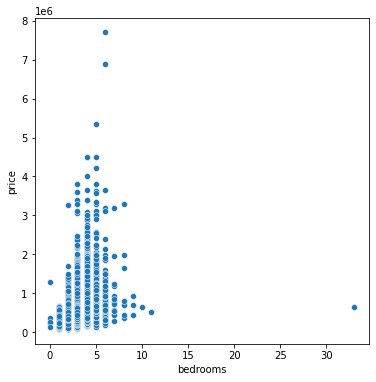

In [48]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = "bedrooms", y = "price", data = house)
plt.show()

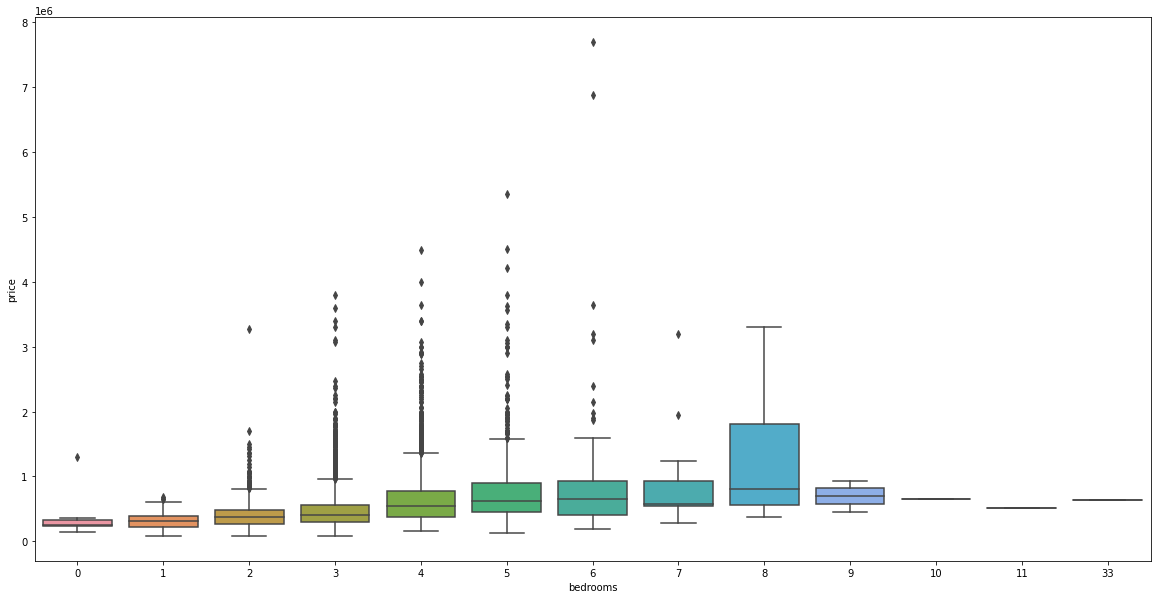

In [74]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x="bedrooms", y="price", data=house)

**By Observing the plot and .describe() for number of bedrooms = 1,2,3,4,5,6 it is weakly correlated or no correlation, but for the remaining enough data is not there**

## Bathrooms

In [55]:
house[["bathrooms","price"]].groupby(["bathrooms"]).describe()

price                                                    \
            count          mean           std        min        25%   
bathrooms                                                             
0.00          4.0  5.069125e+05  5.330046e+05   142000.0   211750.0   
0.75         37.0  3.071554e+05  1.576172e+05    80000.0   204950.0   
1.00       1741.0  3.444786e+05  1.522154e+05    81000.0   234000.0   
1.25          5.0  5.844900e+05  4.602402e+05   275000.0   321950.0   
1.50        599.0  4.120646e+05  1.930546e+05   107000.0   267250.0   
1.75       1431.0  4.578855e+05  2.110991e+05   115000.0   313000.0   
2.00        871.0  4.442665e+05  1.938863e+05   133000.0   290000.0   
2.25        937.0  5.322676e+05  2.928412e+05   160000.0   336000.0   
2.50       2409.0  5.641237e+05  2.769956e+05   158000.0   365000.0   
2.75        525.0  6.573412e+05  3.093041e+05   199950.0   427000.0   
3.00        335.0  7.188356e+05  4.601422e+05   199950.0   437000.0   
3.25        274.0  9.495515e+05  5.650412e+05   176000.0   586125.0   
3.50        339.0  9.116868e+05  4.477490e+05   248000.0   599975.0   
3.75         72.0  1.242336e+06  6.114320e+05   345100.0   846062.5   
4.00         61.0  1.338571e+06  7.849498e+05   315000.0   739000.0   
4.25         33.0  1.522251e+06  7.893310e+05   490000.0   925000.0   
4.50         47.0  1.291945e+06  7.619895e+05   290000.0   788002.5   
4.75          9.0  1.854749e+06  1.023600e+06   599000.0  1075000.0   
5.00         10.0  2.036750e+06  1.527145e+06   343000.0   883375.0   
5.25          5.0  1.880200e+06  1.043888e+06   300000.0  1681000.0   
5.50          6.0  2.865000e+06  1.403620e+06  1240000.0  1662500.0   
5.75          3.0  1.466667e+06  8.025792e+05   540000.0  1230000.0   
6.00          2.0  3.921500e+06  4.051722e+05  3635000.0  3778250.0   
6.25          1.0  3.300000e+06           NaN  3300000.0  3300000.0   
6.50          2.0  1.709445e+06  7.487483e+05  1180000.0  1444722.5   
7.50          1.0  4.500000e+05           NaN   450000.0   450000.0   
7.75          1.0  6.885000e+06           NaN  6885000.0  6885000.0   
8.00          1.0  7.700000e+06           NaN  7700000.0  7700000.0   

                                            
                 50%        75%        max  
bathrooms                                   
0.00        295000.0   590162.5  1295650.0  
0.75        276000.0   355000.0   785000.0  
1.00        315000.0   420000.0  1052000.0  
1.25        397500.0   540000.0  1388000.0  
1.50        375000.0   500000.0  1500000.0  
1.75        423000.0   560000.0  3278000.0  
2.00        414050.0   555632.5  1700000.0  
2.25        467000.0   610000.0  2400000.0  
2.50        510000.0   695000.0  3070000.0  
2.75        591975.0   790000.0  2150000.0  
3.00        612000.0   856000.0  4489000.0  
3.25        810000.0  1138742.5  3640900.0  
3.50        810000.0  1076750.0  3395000.0  
3.75       1094000.0  1528000.0  3345000.0  
4.00       1112500.0  1695000.0  3400000.0  
4.25       1380000.0  2000000.0  3800000.0  
4.50       1050000.0  1599420.0  3567000.0  
4.75       1365000.0  2544750.0  3650000.0  
5.00       1650000.0  2926250.0  5350000.0  
5.25       1862000.0  2458000.0  3100000.0  
5.50       2975000.0  3950000.0  4500000.0  
5.75       1920000.0  1930000.0  1940000.0  
6.00       3921500.0  4064750.0  4208000.0  
6.25       3300000.0  3300000.0  3300000.0  
6.50       1709445.0  1974167.5  2238890.0  
7.50        450000.0   450000.0   450000.0  
7.75       6885000.0  6885000.0  6885000.0  
8.00       7700000.0  7700000.0  7700000.0

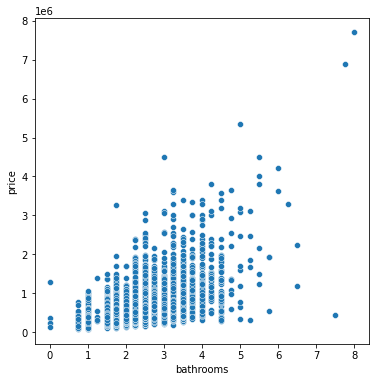

In [99]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = "bathrooms", y = "price", data = house)
plt.show()

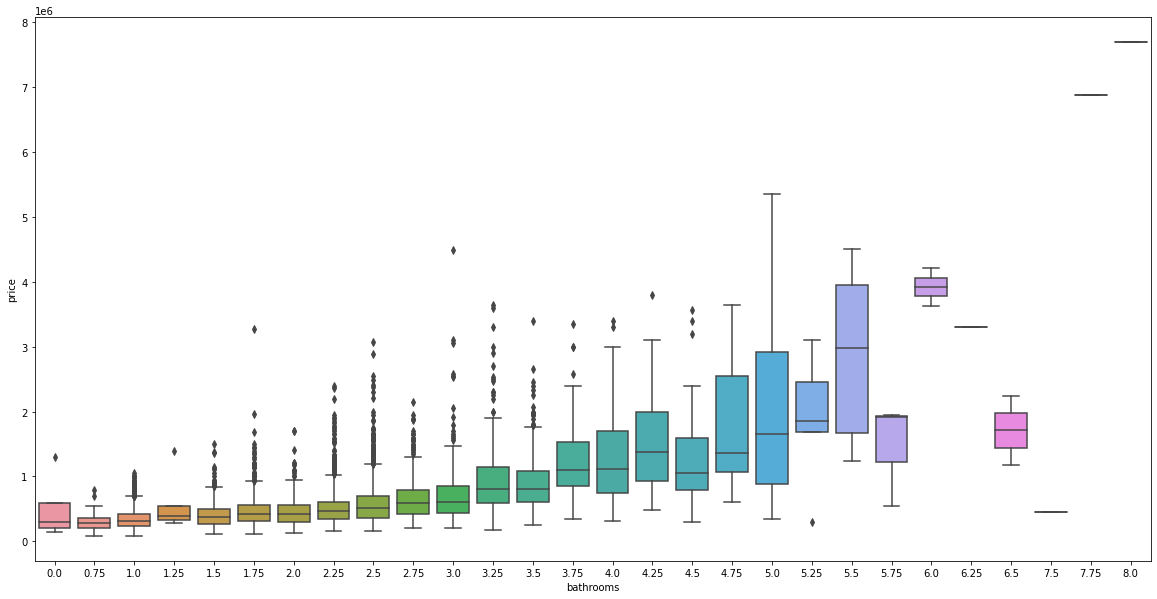

In [73]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x="bathrooms", y="price", data=house)

**bathrooms is weakly positively correlated from the plot so need to be considered**

## sqft_living

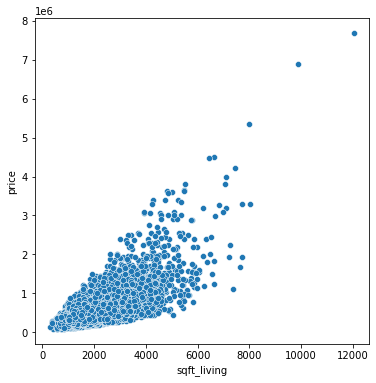

In [63]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = "sqft_living", y = "price", data = house)
plt.show()

**sqft_living is positively correlated so need to be considered**

## sqft_lot

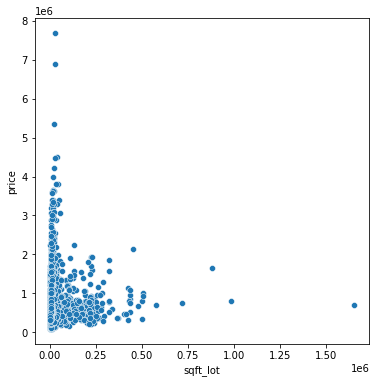

In [75]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = "sqft_lot", y = "price", data = house)
plt.show()

**There is no linearity seen here, so ignoring this column**

## Floors

In [79]:
house[["floors","price"]].groupby(["floors"]).describe()

price                                                              \
         count          mean           std       min        25%        50%   
floors                                                                       
1.0     4862.0  4.396636e+05  2.648808e+05   80000.0   275000.0   383075.0   
1.5      867.0  5.767767e+05  3.288560e+05  123300.0   380000.0   536000.0   
2.0     3723.0  6.559501e+05  4.410320e+05  139500.0   379000.0   550000.0   
2.5       62.0  1.167610e+06  1.164878e+06  255000.0   499250.0   802100.0   
3.0      245.0  5.779881e+05  3.615798e+05  205000.0   380500.0   474950.0   
3.5        2.0  1.912500e+06  1.962221e+06  525000.0  1218750.0  1912500.0   

                              
              75%        max  
floors                        
1.0      529000.0  3800000.0  
1.5      687750.0  3650000.0  
2.0      785000.0  6885000.0  
2.5     1343750.0  7700000.0  
3.0      610000.0  3100000.0  
3.5     2606250.0  3300000.0

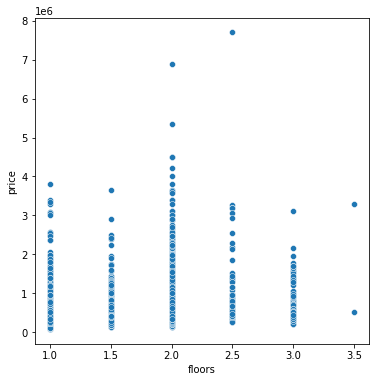

In [88]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = "floors", y = "price", data = house)
plt.show()

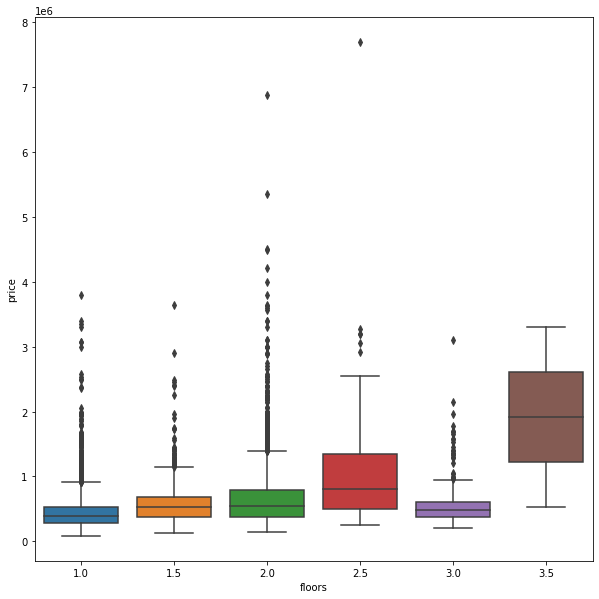

In [78]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="floors", y="price", data=house)

**Floors also does not have any correlation with price, can be ignored**

## waterfront

In [102]:
house[["waterfront","price"]].groupby(["waterfront"]).describe()

price                                                             \
             count          mean           std       min       25%        50%   
waterfront                                                                      
0           9679.0  5.331297e+05  3.547225e+05   80000.0  319970.0   449950.0   
1             82.0  1.676508e+06  1.004797e+06  285000.0  760000.0  1582500.0   

                                  
                  75%        max  
waterfront                        
0            640000.0  7700000.0  
1           2300000.0  4500000.0

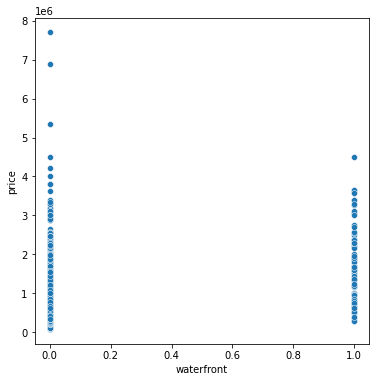

In [103]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = "waterfront", y = "price", data = house)
plt.show()

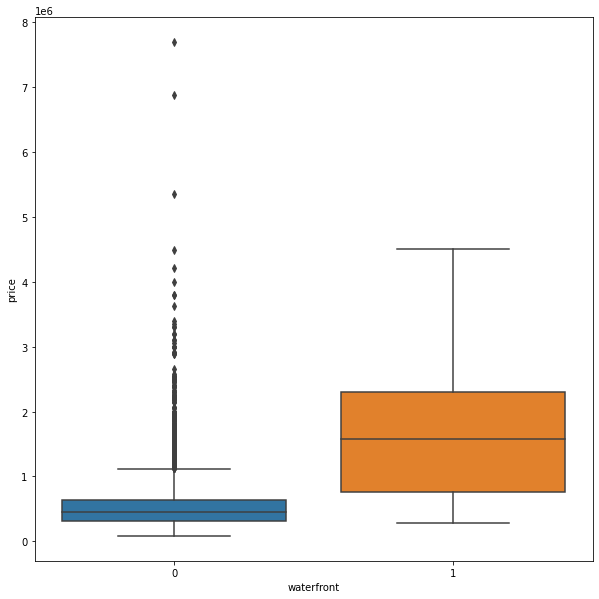

In [108]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x = "waterfront", y="price", data=house)

**0 have many outliers and 1 has less data, but this might impact**

##  view

In [105]:
house[["view","price"]].groupby(["view"]).describe()

price                                                             \
       count          mean           std       min       25%        50%   
view                                                                      
0     8748.0  4.963600e+05  2.939117e+05   80000.0  310000.0   430000.0   
1      160.0  8.150720e+05  5.030568e+05  217000.0  508000.0   680000.0   
2      454.0  7.931251e+05  4.657146e+05  169317.0  500000.0   681000.0   
3      243.0  9.472500e+05  6.541233e+05  154000.0  550000.0   790000.0   
4      156.0  1.505171e+06  1.031124e+06  252000.0  807500.0  1195000.0   

                            
            75%        max  
view                        
0      600000.0  4489000.0  
1      958750.0  3345000.0  
2      950000.0  3800000.0  
3     1214250.0  7700000.0  
4     1910000.0  6885000.0

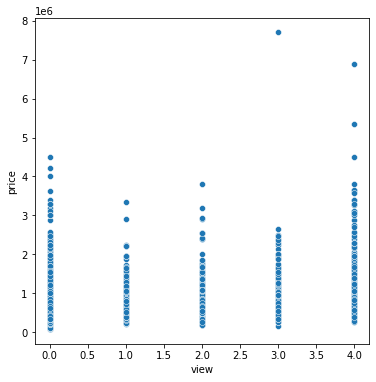

In [106]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = "view", y = "price", data = house)
plt.show()

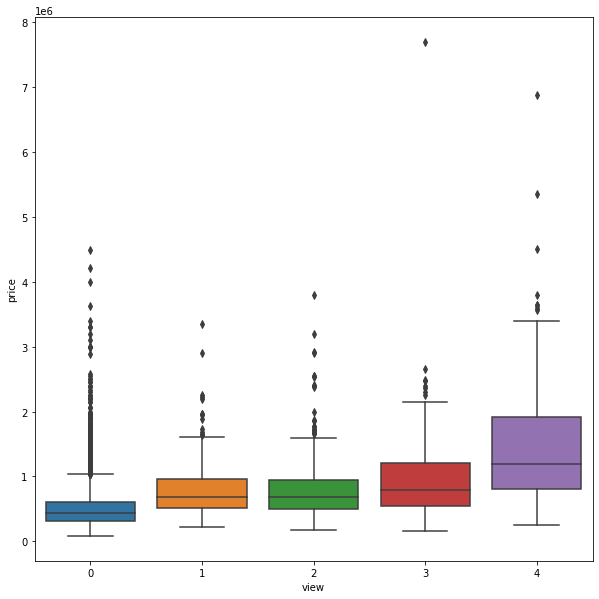

In [109]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x = "view", y="price", data=house)

**0 is more biased, but there is a slight correlation**

## condition	

In [110]:
house[["condition","price"]].groupby(["condition"]).describe()

price                                                              \
            count           mean            std       min       25%       50%   
condition                                                                       
1            10.0  471500.000000  403756.596093   81000.0  256500.0  396000.0   
2            78.0  328911.064103  301271.616353   80000.0  183750.0  269975.0   
3          6291.0  543123.240343  372158.596376   86500.0  325625.0  450000.0   
4          2610.0  519824.937931  370782.816009  100000.0  301000.0  436400.0   
5           772.0  639552.340674  448804.933600  140000.0  354687.5  545000.0   

                                
                75%        max  
condition                       
1          542500.0  1500000.0  
2          372500.0  2555000.0  
3          645250.0  6885000.0  
4          625000.0  7700000.0  
5          746237.5  3650000.0

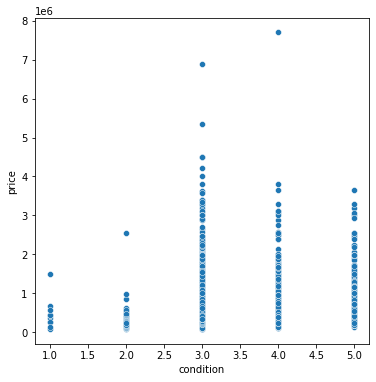

In [111]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = "condition", y = "price", data = house)
plt.show()

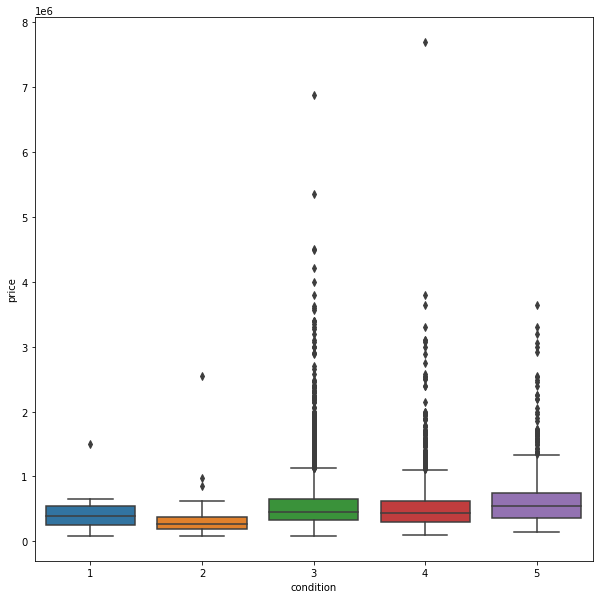

In [116]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x = house.condition, y="price", data=house)

**No strong correlation**

## grade

In [117]:
house[["grade","price"]].groupby(["grade"]).describe()

price                                                               \
        count          mean           std        min        25%        50%   
grade                                                                        
1         1.0  1.420000e+05           NaN   142000.0   142000.0   142000.0   
4        17.0  2.208853e+05  9.951337e+04    80000.0   151000.0   217000.0   
5       107.0  2.280887e+05  9.164311e+04    81000.0   157500.0   215000.0   
6       914.0  3.036966e+05  1.255649e+05    86500.0   215000.0   280000.0   
7      4067.0  4.016521e+05  1.574742e+05   100000.0   284525.0   371000.0   
8      2707.0  5.425066e+05  2.208845e+05   160000.0   390000.0   506000.0   
9      1192.0  7.766575e+05  3.124217e+05   259950.0   575000.0   725944.0   
10      532.0  1.078128e+06  5.066496e+05   316000.0   774037.5   911500.0   
11      172.0  1.530820e+06  6.875031e+05   420000.0  1061875.0  1295000.0   
12       45.0  2.166210e+06  1.061354e+06   835000.0  1488000.0  1769000.0   
13        7.0  4.221429e+06  2.233332e+06  1780000.0  2792500.0  3800000.0   

                             
             75%        max  
grade                        
1       142000.0   142000.0  
4       265000.0   435000.0  
5       284000.0   658000.0  
6       365000.0  1052000.0  
7       487000.0  1650000.0  
8       637750.0  3070000.0  
9       889237.5  2546000.0  
10     1250000.0  3600000.0  
11     1812500.0  3650000.0  
12     2574000.0  5350000.0  
13     5342500.0  7700000.0

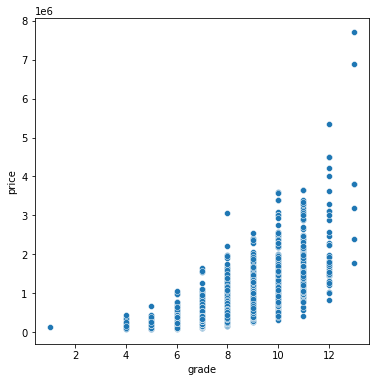

In [118]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = house.grade, y = "price", data = house)
plt.show()

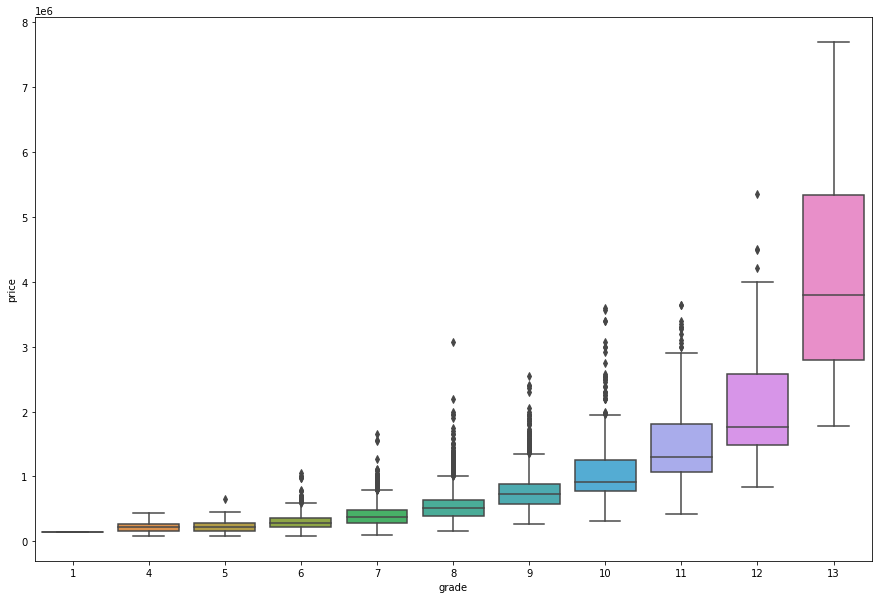

In [120]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x = house.grade, y="price", data=house)

**Strongly positive Correlation with grade**

## sqft_above

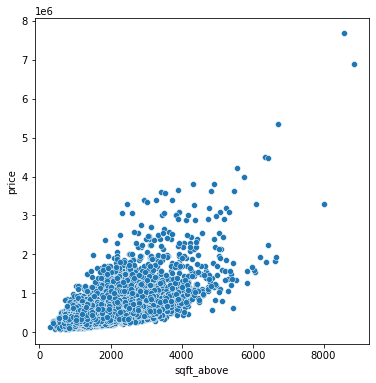

In [121]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = house.sqft_above, y = "price", data = house)
plt.show()

**Strong positive correlation with price**

## sqft_basement

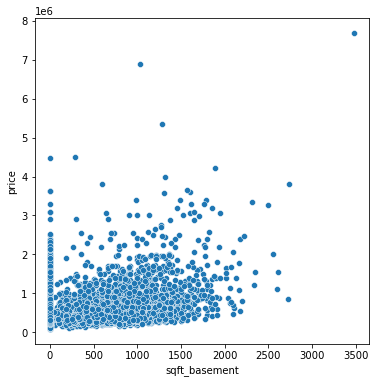

In [122]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = house.sqft_basement, y = "price", data = house)
plt.show()

**weak positive correlation but need to consider sqft_living with this condition as sqft_above + sqft_basement**

## yr_built

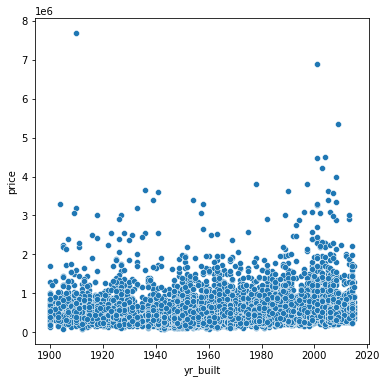

In [123]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = house.yr_built, y = "price", data = house)
plt.show()

**There is no correlation here**

## yr_renovated

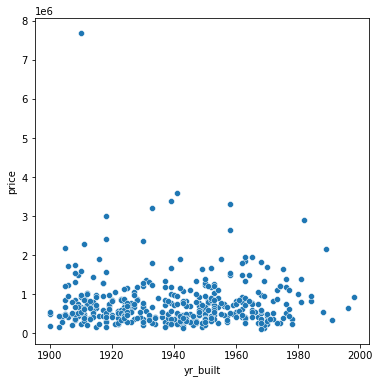

In [133]:
data1 = house[house.yr_renovated != 0].copy()

plt.figure(figsize=(6,6))
sns.scatterplot(x = data1.yr_built, y = "price", data = data1)
plt.show()

**There is no correlation of price with the renovation**

## zipcode

In [135]:
house[["zipcode","price"]].groupby(["zipcode"]).describe()

price                                                               \
         count          mean            std       min        25%        50%   
zipcode                                                                       
98001    158.0  2.799354e+05   98974.510305  100000.0  215625.00   260000.0   
98002     78.0  2.350487e+05   53195.262077  112000.0  203125.00   234500.0   
98003    123.0  3.098921e+05  120166.897483  128000.0  243500.00   280000.0   
98004    138.0  1.433854e+06  746510.792209  610000.0  911250.00  1270000.0   
98005     76.0  7.848988e+05  251994.320805  400000.0  617862.50   741725.0   
...        ...           ...            ...       ...        ...        ...   
98177    122.0  6.460942e+05  456307.824747  245560.0  402000.00   525150.0   
98178    110.0  3.096124e+05  181582.992199   90000.0  221760.25   276277.0   
98188     57.0  2.934215e+05  111573.782334  130000.0  233000.00   259500.0   
98198    127.0  2.916772e+05  136612.629475  120000.0  226250.00   265000.0   
98199    140.0  8.073665e+05  384491.970080  330000.0  542911.25   704500.0   

                               
               75%        max  
zipcode                        
98001     304250.0   850000.0  
98002     265000.0   389000.0  
98003     345950.0   950000.0  
98004    1697750.0  5350000.0  
98005     885000.0  1900000.0  
...            ...        ...  
98177     668750.0  3800000.0  
98178     348152.5  1700000.0  
98188     325000.0   706000.0  
98198     309500.0  1225000.0  
98199     982500.0  3200000.0  

[70 rows x 8 columns]

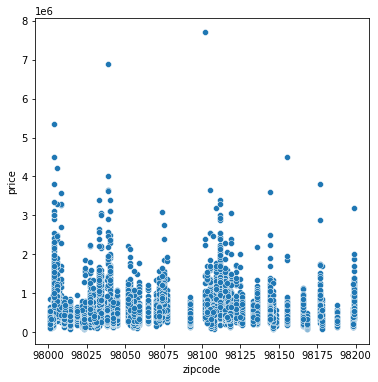

In [136]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = house.zipcode, y = "price", data = house)
plt.show()

**There is no much correlation**

## sqft_living15

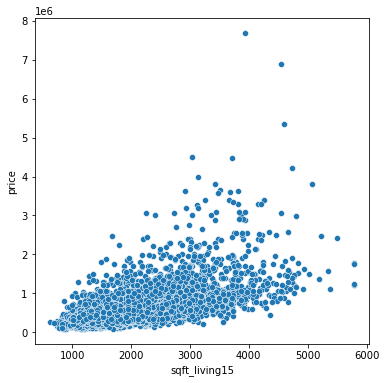

In [138]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = house.sqft_living15, y = "price", data = house)
plt.show()

**There is a positive correlation**

## sqft_lot15

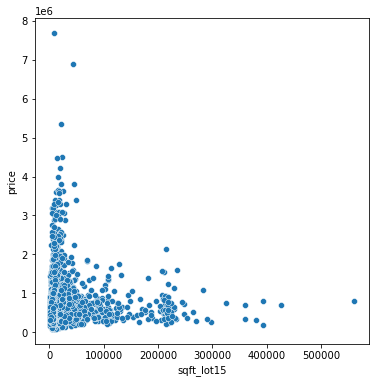

In [144]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = house.sqft_lot15, y = "price", data = house)
plt.show()

**There is no much correlation here**

## lat and long

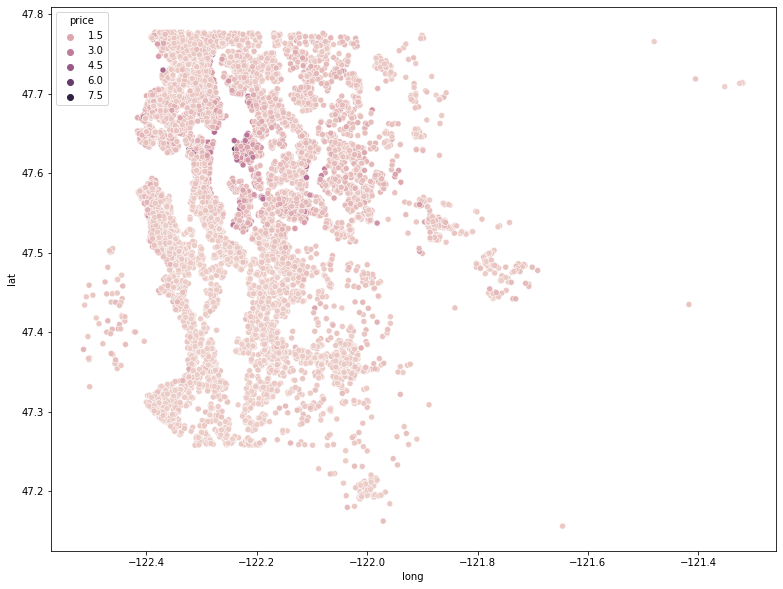

In [182]:
plt.figure(figsize=(13,10))
sns.scatterplot(y = house.lat, x = house.long,hue = house.price)
plt.show()

In [198]:
house[(house.lat < house.lat.mean())].price.mean()

399913.368246968

In [197]:
house[(house.lat > house.lat.mean())].price.mean()

666672.165709912

**So here we can clearly see the darker points at higher altitudes in the above scatter plot. Verified the mean price above and below latitude mean. So this is impacting the price. So considered lat and long.**

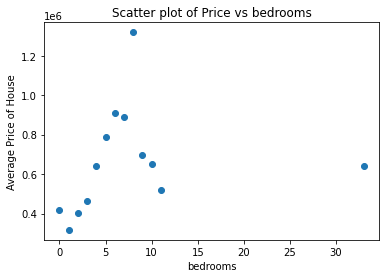

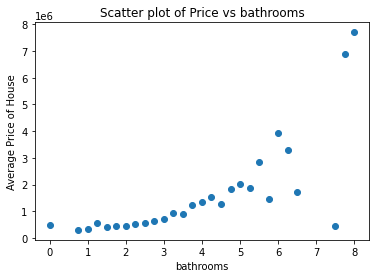

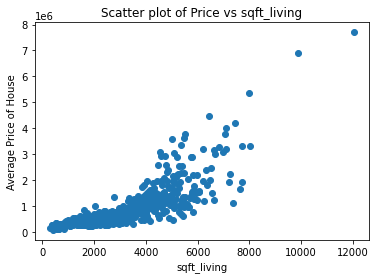

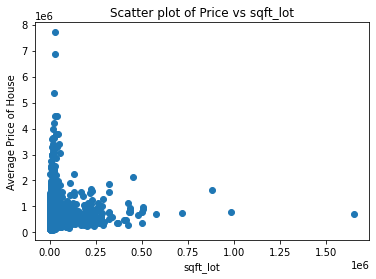

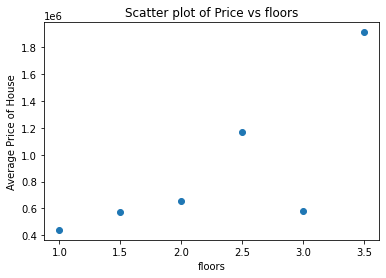

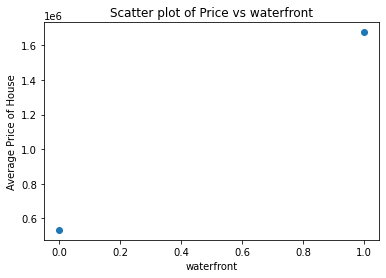

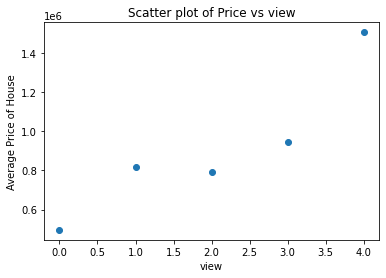

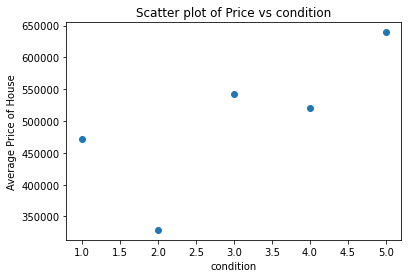

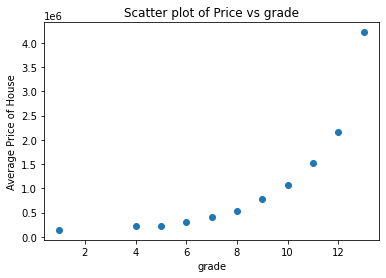

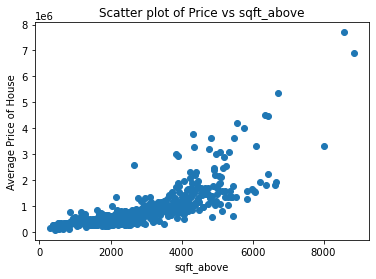

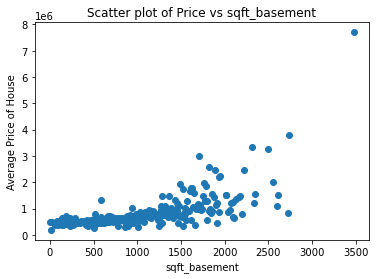

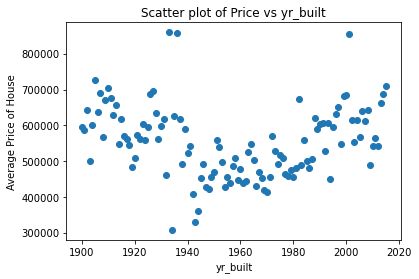

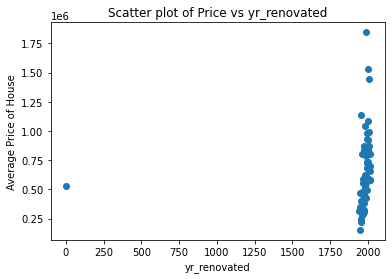

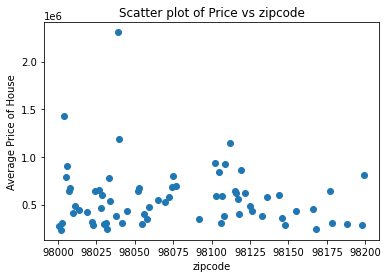

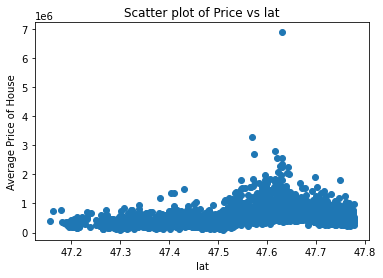

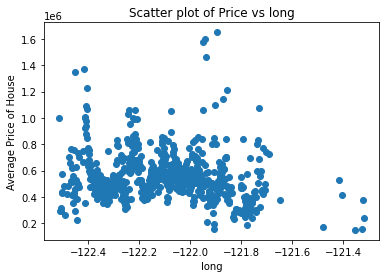

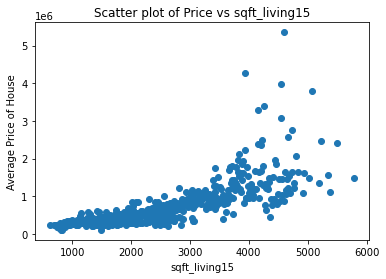

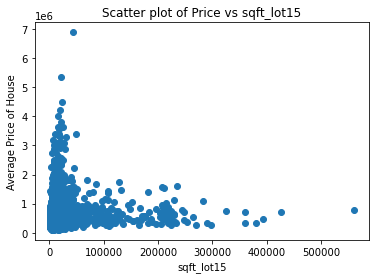

In [7]:
house_copy = house.copy()
house_copy2 = house_copy.drop(["id","date"],axis = 1)
for i in house_copy2.columns:
    if i != "price":
        j = pd.DataFrame(house_copy2[[i,"price"]].groupby([i]).describe())
        plt.scatter(j.index,j["price"]["mean"])
        plt.title("Scatter plot of Price vs {}".format(i))
        plt.xlabel(i)
        plt.ylabel("Average Price of House")
        plt.savefig("{}.png".format(i))
        plt.show()

In [5]:
house_copy

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
9757,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
9758,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
9759,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


## heat map

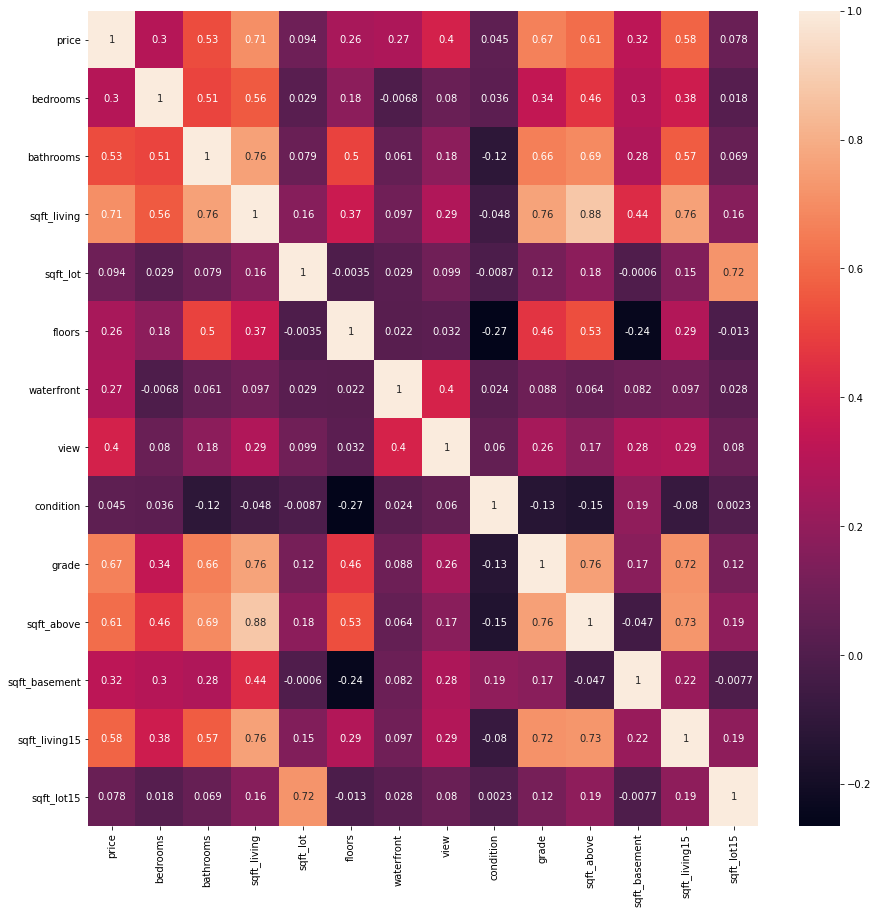

In [169]:
house_heatmap = house.drop(["id", "date", "yr_built","yr_renovated","zipcode",
                           "lat","long"], axis=1)
plt.figure(figsize=(15,15))
ax = sns.heatmap(house_heatmap.corr(),annot=True)


## Report for EDA :
### from this heat map we can see sqft_living15,sqft_above,grade,sqft_living,bathrooms have high correlation with price.

### view, bedrooms,sqft_basement,waterfront,condition and floors have mild correlation with price

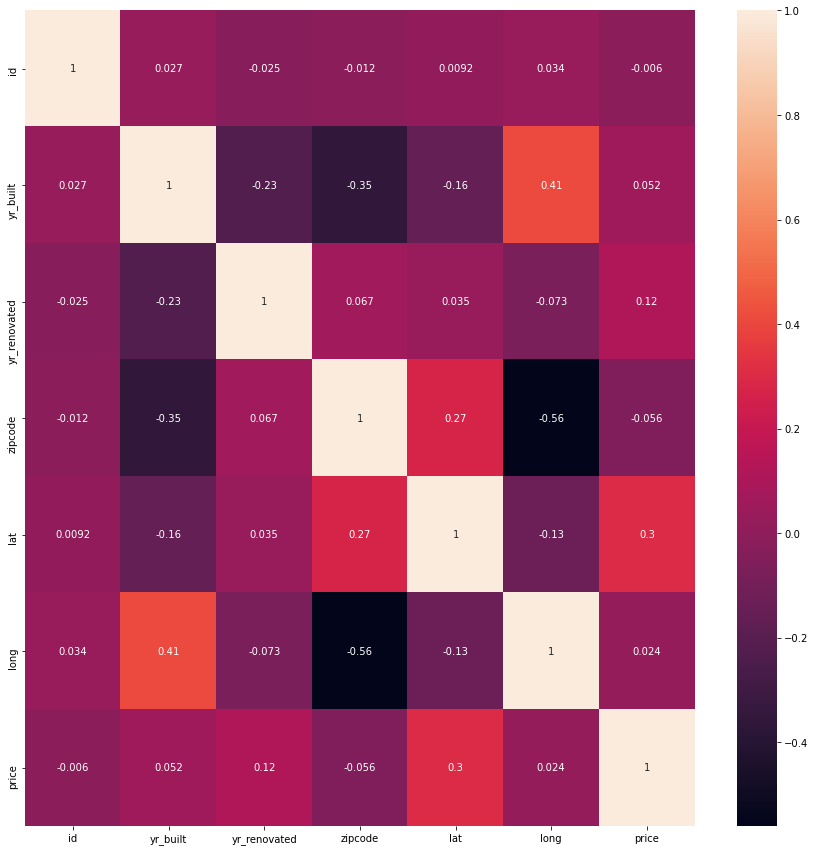

In [12]:
# None of these factors have any correlation here.
house_heatmap_1 = house[["id", "date", "yr_built","yr_renovated","zipcode",
                           "lat","long","price"]]
plt.figure(figsize=(15,15))
ax = sns.heatmap(house_heatmap_1.corr(),annot=True)

## Report :
### None of these factors have any correlation with price, but lat and long should be considered as they are impacting the price.

#  3) Initial model(Linear Regression) fitting step

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

In [13]:
# fucntion to do 10k crossfold and return r2 and rmse for linear regression.
def tenfold_cv(X_train,y_train):
    cv = KFold(n_splits=10, shuffle=True,random_state=10)
    model = LinearRegression()
    r2 = cross_val_score(model, X_train, y_train, scoring='r2',
                             cv=cv)
    rmse = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error',
                             cv=cv)
    return(r2.mean(),np.sqrt(abs(rmse.mean())))

#### This function is used to find 10 fold cross validation for linear regression and returns r2 and rmse values

## Set 1

In [190]:
X_train_set1 = house[["sqft_above","grade","sqft_living","bathrooms"]]
y_train = house[["price"]]
tenfold_cv(X_train_set1,y_train)

(0.5401134383019407, 257002.3218427827)

**We have these predictors as they have high correlation with price from the heat map**

## Set 2

In [191]:
X_train_set2 = house[["sqft_above","grade","sqft_living","view"]]
y_train = house[["price"]]
tenfold_cv(X_train_set2,y_train)

(0.5705204163286636, 248100.92298832885)

**We have added another predictor view which has next highest correlation value.**

## Set 3

In [192]:
X_train_set3 = house[["grade","sqft_living","bathrooms","view","waterfront","condition"]]
y_train = house[["price"]]
tenfold_cv(X_train_set3,y_train)

(0.5973029127958915, 240331.07687580652)

**we have added other predictors which have some mild correlation with price and we can see clearly rmse value has decreased and r2 increased**

## Set 4

In [247]:
X_train_set4 = house[['bathrooms','sqft_living','waterfront','view','grade','lat','long']]
y_train = house[["price"]]
tenfold_cv(X_train_set4,y_train)

(0.6584196584360187, 221672.0601710325)

#### Various sets of predictors are considered, but the last set have highest r2 and lowest rmse

## Report :

#### During the initial model fitting, by considering the columns ['bathrooms','sqft_living','waterfront','view','grade','lat','long'], they are giving the highest r2 and lowest rmse values.
**r2 = 0.6584196584360187**

**rmse = 221672.0601710325**

## Outlier treatment - Univariate analysis

Outlier is a data point in the dataset that differs significantly from the other data or observations. The outlier is inherently different than Noise. While Outlier is a data that significantly different compared to the other data, Noise is a random error or variance. The outlier is part of the data, but Noise is just a random error.

So outliers should be treated properly before fitting the model.

In [265]:
# finding oultilers for price.

Q1 = house["price"].quantile(.25)
Q3 = house["price"].quantile(.75)
IQR= Q3-Q1
upper_limit_price = Q3 + (IQR*1.5)
lower_limit_price = Q1 - (IQR*1.5)

# taking the subset of outliers
outliers_price = house[(house.price < lower_limit_price) | (house.price > upper_limit_price )]

In [281]:
outliers_price.shape

(522, 21)

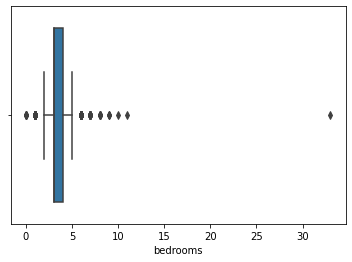

In [272]:
sns.boxplot(x = house.bedrooms)
plt.show()

In [284]:
Q1 = house["bedrooms"].quantile(.25)
Q3 = house["bedrooms"].quantile(.75)
IQR= Q3-Q1
upper_limit_bedrooms = Q3 + (IQR*1.5)
lower_limit_bedrooms = Q1 - (IQR*1.5)
print("Upperlimit and lower limit of bedrooms :",upper_limit_bedrooms,lower_limit_bedrooms)

Upperlimit and lower limit of bedrooms : 5.5 1.5


In [259]:
outliers_price[["price","bedrooms"]].groupby("bedrooms").describe()

price                                                               \
          count          mean           std        min        25%        50%   
bedrooms                                                                       
0           1.0  1.295650e+06           NaN  1295650.0  1295650.0  1295650.0   
2          11.0  1.543455e+06  5.951908e+05  1150000.0  1279000.0  1365000.0   
3         102.0  1.604408e+06  5.485165e+05  1150000.0  1225000.0  1415000.0   
4         254.0  1.646045e+06  5.376583e+05  1145000.0  1261000.0  1471500.0   
5         127.0  1.763713e+06  7.503655e+05  1150000.0  1297500.0  1500000.0   
6          20.0  2.427600e+06  1.812270e+06  1150000.0  1366250.0  1732500.0   
7           4.0  1.893750e+06  9.379355e+05  1185000.0  1226250.0  1595000.0   
8           3.0  2.306667e+06  8.750048e+05  1650000.0  1810000.0  1970000.0   

                                
                75%        max  
bedrooms                        
0         1295650.0  1295650.0  
2         1478500.0  3278000.0  
3         1698500.0  3800000.0  
4         1800000.0  4489000.0  
5         1907500.0  5350000.0  
6         2575000.0  7700000.0  
7         2262500.0  3200000.0  
8         2635000.0  3300000.0

**So here we can see that some of the outliers in price are also present in the conditions for outliers of bedrooms**

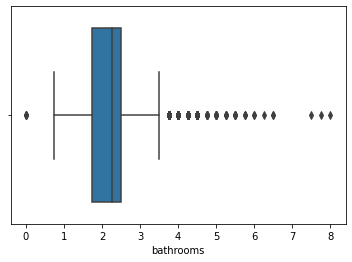

In [273]:
sns.boxplot(x = house.bathrooms)
plt.show()

In [285]:
Q1 = house["bathrooms"].quantile(.25)
Q3 = house["bathrooms"].quantile(.75)
IQR= Q3-Q1
upper_limit_bathrooms = Q3 + (IQR*1.5)
lower_limit_bathrooms = Q1 - (IQR*1.5)
print("Upperlimit and lower limit of bathrooms :",upper_limit_bathrooms,lower_limit_bathrooms)

Upperlimit and lower limit of bathrooms : 3.625 0.625


In [261]:
outliers_price[["price","bathrooms"]].groupby("bathrooms").describe()

price                                                               \
          count          mean           std        min        25%        50%   
bathrooms                                                                      
0.00        1.0  1.295650e+06           NaN  1295650.0  1295650.0  1295650.0   
1.25        1.0  1.388000e+06           NaN  1388000.0  1388000.0  1388000.0   
1.50        4.0  1.345000e+06  1.449713e+05  1150000.0  1303750.0  1365000.0   
1.75       17.0  1.475235e+06  5.094966e+05  1155000.0  1200000.0  1350000.0   
2.00        6.0  1.395333e+06  2.484767e+05  1175000.0  1200000.0  1300000.0   
2.25       45.0  1.484162e+06  3.331676e+05  1150000.0  1220000.0  1325000.0   
2.50       87.0  1.479967e+06  3.988793e+05  1150000.0  1228750.0  1325000.0   
2.75       36.0  1.466851e+06  2.568119e+05  1168000.0  1223250.0  1440000.0   
3.00       38.0  1.666177e+06  6.981637e+05  1150000.0  1252500.0  1373900.0   
3.25       68.0  1.720376e+06  5.867945e+05  1150000.0  1271222.5  1542500.0   
3.50       79.0  1.576165e+06  3.898295e+05  1145000.0  1296500.0  1481000.0   
3.75       34.0  1.712676e+06  5.713800e+05  1150000.0  1341750.0  1553500.0   
4.00       30.0  1.954259e+06  6.673383e+05  1195000.0  1413500.0  1725000.0   
4.25       21.0  1.926376e+06  7.117087e+05  1150000.0  1400000.0  1679000.0   
4.50       23.0  1.876042e+06  6.695654e+05  1225000.0  1393500.0  1599950.0   
4.75        6.0  2.338292e+06  8.994143e+05  1350000.0  1573750.0  2372375.0   
5.00        7.0  2.655000e+06  1.412312e+06  1180000.0  1650000.0  2480000.0   
5.25        4.0  2.275250e+06  6.422665e+05  1681000.0  1816750.0  2160000.0   
5.50        6.0  2.865000e+06  1.403620e+06  1240000.0  1662500.0  2975000.0   
5.75        2.0  1.930000e+06  1.414214e+04  1920000.0  1925000.0  1930000.0   
6.00        2.0  3.921500e+06  4.051722e+05  3635000.0  3778250.0  3921500.0   
6.25        1.0  3.300000e+06           NaN  3300000.0  3300000.0  3300000.0   
6.50        2.0  1.709445e+06  7.487483e+05  1180000.0  1444722.5  1709445.0   
7.75        1.0  6.885000e+06           NaN  6885000.0  6885000.0  6885000.0   
8.00        1.0  7.700000e+06           NaN  7700000.0  7700000.0  7700000.0   

                                 
                 75%        max  
bathrooms                        
0.00       1295650.0  1295650.0  
1.25       1388000.0  1388000.0  
1.50       1406250.0  1500000.0  
1.75       1450000.0  3278000.0  
2.00       1622750.0  1700000.0  
2.25       1695000.0  2400000.0  
2.50       1581250.0  3070000.0  
2.75       1612500.0  2150000.0  
3.00       1683750.0  4489000.0  
3.25       1862500.0  3640900.0  
3.50       1740000.0  3395000.0  
3.75       1943750.0  3345000.0  
4.00       2363750.0  3400000.0  
4.25       2250000.0  3800000.0  
4.50       1967000.0  3567000.0  
4.75       2826187.5  3650000.0  
5.00       3137500.0  5350000.0  
5.25       2618500.0  3100000.0  
5.50       3950000.0  4500000.0  
5.75       1935000.0  1940000.0  
6.00       4064750.0  4208000.0  
6.25       3300000.0  3300000.0  
6.50       1974167.5  2238890.0  
7.75       6885000.0  6885000.0  
8.00       7700000.0  7700000.0

**Outliers of price present in outliers of bathrooms as well**

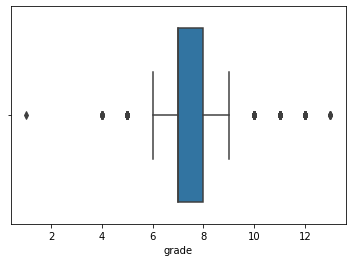

In [274]:
sns.boxplot(x = house.grade)
plt.show()

In [286]:
Q1 = house["grade"].quantile(.25)
Q3 = house["grade"].quantile(.75)
IQR= Q3-Q1
upper_limit_grade = Q3 + (IQR*1.5)
lower_limit_grade = Q1 - (IQR*1.5)
print("Upperlimit and lower limit of grade :",upper_limit_grade,lower_limit_grade)

Upperlimit and lower limit of grade : 9.5 5.5


In [262]:
outliers_price[["price","grade"]].groupby("grade").describe()

price                                                               \
       count          mean           std        min        25%        50%   
grade                                                                       
7        4.0  1.507500e+06  1.647473e+05  1270000.0  1476250.0  1555000.0   
8       57.0  1.416825e+06  3.286851e+05  1150000.0  1210000.0  1300000.0   
9      133.0  1.451080e+06  2.931907e+05  1150000.0  1240000.0  1350000.0   
10     167.0  1.658707e+06  5.213152e+05  1146800.0  1282500.0  1495000.0   
11     112.0  1.840349e+06  6.637137e+05  1145000.0  1346125.0  1605000.0   
12      42.0  2.252415e+06  1.046006e+06  1212500.0  1503750.0  1799500.0   
13       7.0  4.221429e+06  2.233332e+06  1780000.0  2792500.0  3800000.0   

                             
             75%        max  
grade                        
7      1586250.0  1650000.0  
8      1500000.0  3070000.0  
9      1570000.0  2546000.0  
10     1832375.0  3600000.0  
11     2150000.0  3650000.0  
12     2803875.0  5350000.0  
13     5342500.0  7700000.0

**Outliers for price present in outliers of grade**

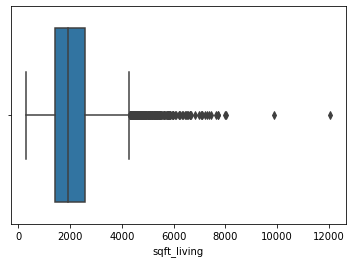

In [276]:
sns.boxplot(x = house.sqft_living)
plt.show()

In [278]:
Q1 = house["sqft_living"].quantile(.25)
Q3 = house["sqft_living"].quantile(.75)
IQR= Q3-Q1
upper_limit_sqft_living = Q3 + (IQR*1.5)
lower_limit_sqft_living = Q1 - (IQR*1.5)
print("Upperlimit and lower limit of sqft_living :",upper_limit_sqft_living,lower_limit_sqft_living)

Upperlimit and lower limit of sqft_living : 4295.0 -305.0


In [279]:
outliers_price[(outliers_price.sqft_living > upper_limit_price)].price.count()

170

**out of 522 price outliers 170 are present in sqft_living outliers, so they might impact something** 

## Report :
#### In this way we can see, outliers in price can describe the outliers in other columns and they give us some extraordinary data , so we are not removing them and decided to keep them in the data

# 4. Feature Engineering

Feature engineering is a process of using domain knowledge to create/extract new features from a given dataset by using data mining techniques. It helps machine learning algorithms to understand data and determine patterns that can improve the performance of machine learning algorithms.


Various Techniques :
- Value transformation: 
      We can use feature transformations like log(X), sqrt(X), X^2.
      And also we can create a new column by merging two or more columns in a meaningful way.
- One-hot encoding :
      One hot encoding is one method of converting data to prepare it for an algorithm and get a better prediction. With onehot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns. Each integer value is represented as a binary vector. All the values are zero, and the index is marked with a 1.
      While this is helpful for some ordinal situations, some input data does not have any ranking for category values, and this can lead to issues with predictions and poor performance.


### 1) Value Transformation

In [261]:
house_1 = house.copy()

#### considering only numeric columns

In [262]:
# adding new columns by taking log
house_1["sqft_living_log"]=np.log(house.sqft_living)
house_1["sqft_lot_log"]=np.log(house.sqft_lot)
house_1["sqft_above_log"]=np.log(house.sqft_above)
house_1["sqft_basement_log"]=np.log(house.sqft_basement+1)
house_1["sqft_living_square"]=np.square(house.sqft_living)

In [263]:
house_1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_living_log,sqft_lot_log,sqft_above_log,sqft_basement_log,sqft_living_square
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,7.580700,8.517193,6.956545,6.814543,3841600
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,8.597851,11.532042,8.266164,7.333676,29376400
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000,7.056175,8.699515,6.756932,5.707110,1345600
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,7.265430,9.898525,7.265430,0.000000,2044900
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208,7.222566,9.177817,7.222566,0.000000,1876900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230,7.306531,7.026427,7.306531,0.000000,2220100
9757,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023,7.832014,8.703341,7.832014,0.000000,6350400
9758,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200,8.163371,8.881836,7.863267,6.814543,12320100
9759,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,6.927558,7.207860,6.927558,0.000000,1040400


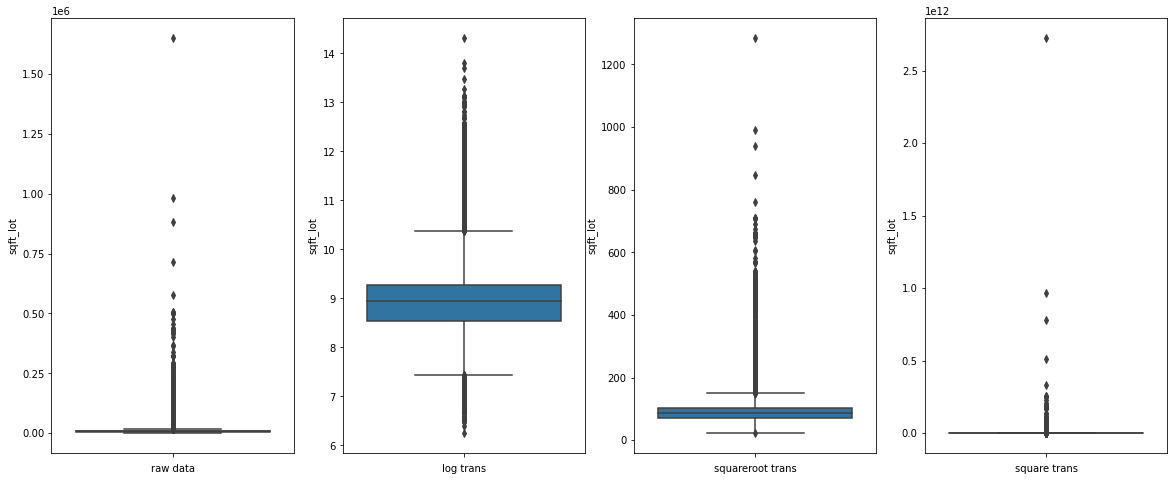

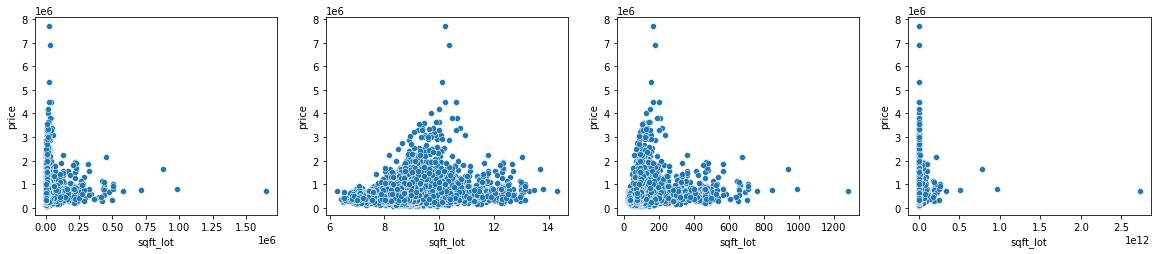

In [264]:
plt.figure(figsize=(20,8))
plt.subplot(1,4,1)
plt.xlabel("raw data")
sns.boxplot(y=house_1.sqft_lot)
plt.subplot(1,4,2)
plt.xlabel("log trans")
sns.boxplot(y=np.log(house_1.sqft_lot))
plt.subplot(1,4,3)
plt.xlabel("squareroot trans")
sns.boxplot(y=np.sqrt(house_1.sqft_lot))
plt.subplot(1,4,4)
plt.xlabel("square trans")
sns.boxplot(y=np.square(house_1.sqft_lot))
plt.show()
plt.figure(figsize=(20,8))
plt.subplot(2,4,1)
plt.xlabel("sqft_lot")
sns.scatterplot(x=house_1.sqft_lot,y=house_1.price)
plt.subplot(2,4,2)
plt.xlabel("sqft_lot")
sns.scatterplot(y=house_1.price,x=np.log(house_1.sqft_lot ))
plt.subplot(2,4,3)
plt.xlabel("sqft_lot")
sns.scatterplot(y=house_1.price,x=np.sqrt(house_1.sqft_lot))
plt.subplot(2,4,4)
plt.xlabel("sqft_lot")
sns.scatterplot(y=house_1.price,x=np.square(house_1.sqft_lot))
plt.show()

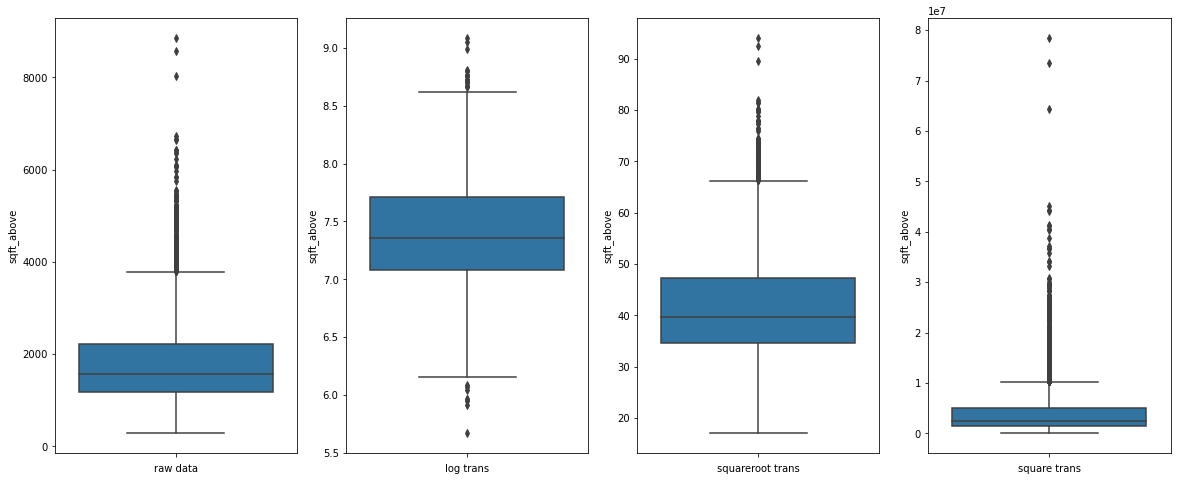

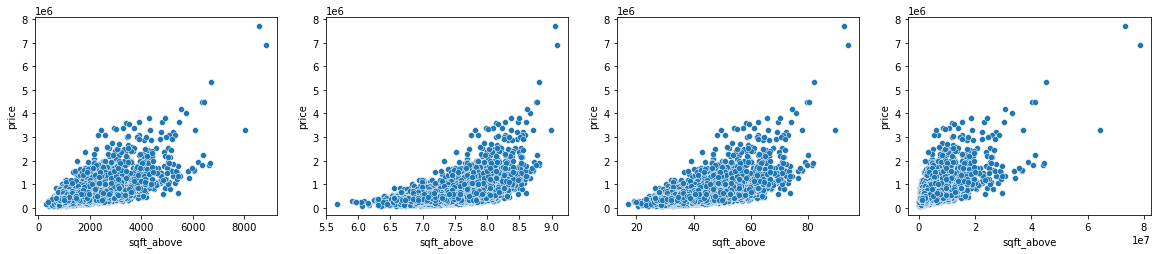

In [265]:
plt.figure(figsize=(20,8))
plt.subplot(1,4,1)
plt.xlabel("raw data")
sns.boxplot(y=house_1.sqft_above)
plt.subplot(1,4,2)
plt.xlabel("log trans")
sns.boxplot(y=np.log(house_1.sqft_above))
plt.subplot(1,4,3)
plt.xlabel("squareroot trans")
sns.boxplot(y=np.sqrt(house_1.sqft_above))
plt.subplot(1,4,4)
plt.xlabel("square trans")
sns.boxplot(y=np.square(house_1.sqft_above))
plt.show()
plt.figure(figsize=(20,8))
plt.subplot(2,4,1)
plt.xlabel("sqft_above")
sns.scatterplot(x=house_1.sqft_above,y=house_1.price)
plt.subplot(2,4,2)
plt.xlabel("sqft_above")
sns.scatterplot(y=house_1.price,x=np.log(house_1.sqft_above ))
plt.subplot(2,4,3)
plt.xlabel("sqft_above")
sns.scatterplot(y=house_1.price,x=np.sqrt(house_1.sqft_above))
plt.subplot(2,4,4)
plt.xlabel("sqft_above")
sns.scatterplot(y=house_1.price,x=np.square(house_1.sqft_above))
plt.show()

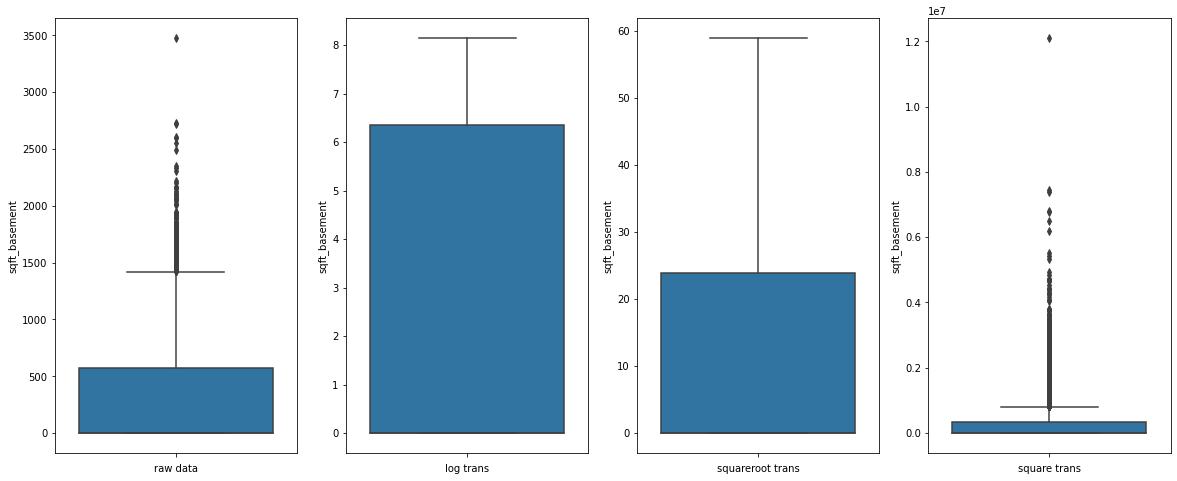

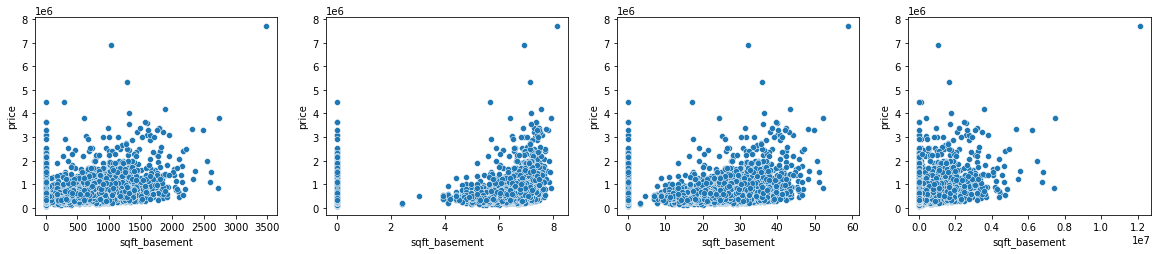

In [266]:
plt.figure(figsize=(20,8))
plt.subplot(1,4,1)
plt.xlabel("raw data")
sns.boxplot(y=house_1.sqft_basement)
plt.subplot(1,4,2)
plt.xlabel("log trans")
sns.boxplot(y=np.log(house_1.sqft_basement+1))
plt.subplot(1,4,3)
plt.xlabel("squareroot trans")
sns.boxplot(y=np.sqrt(house_1.sqft_basement))
plt.subplot(1,4,4)
plt.xlabel("square trans")
sns.boxplot(y=np.square(house_1.sqft_basement))
plt.show()
plt.figure(figsize=(20,8))
plt.subplot(2,4,1)
plt.xlabel("sqft_basement")
sns.scatterplot(x=house_1.sqft_basement,y=house_1.price)
plt.subplot(2,4,2)
plt.xlabel("sqft_basement")
sns.scatterplot(y=house_1.price,x=np.log(house_1.sqft_basement+1 ))
plt.subplot(2,4,3)
plt.xlabel("sqft_basement")
sns.scatterplot(y=house_1.price,x=np.sqrt(house_1.sqft_basement))
plt.subplot(2,4,4)
plt.xlabel("sqft_basement")
sns.scatterplot(y=house_1.price,x=np.square(house_1.sqft_basement))
plt.show()

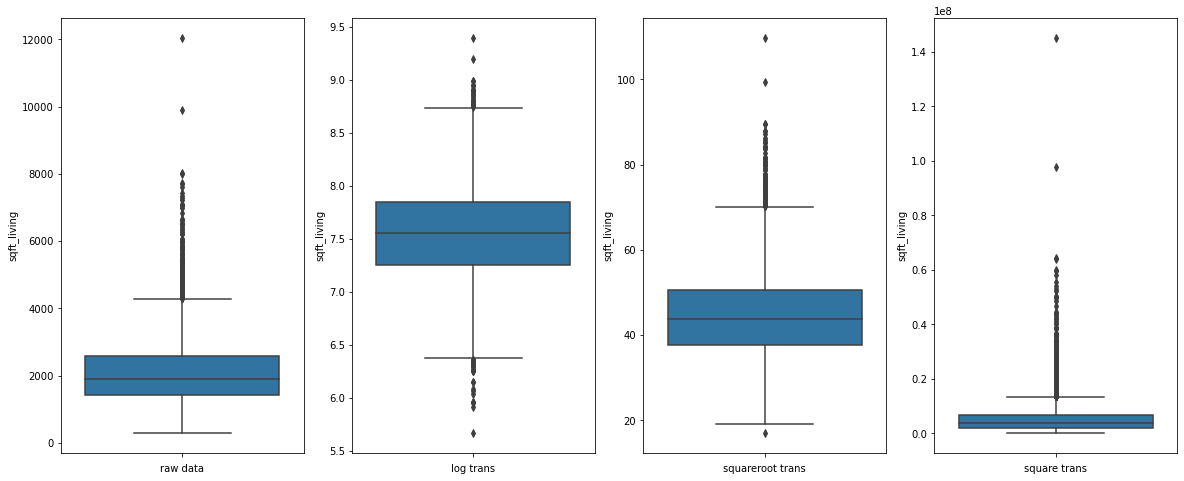

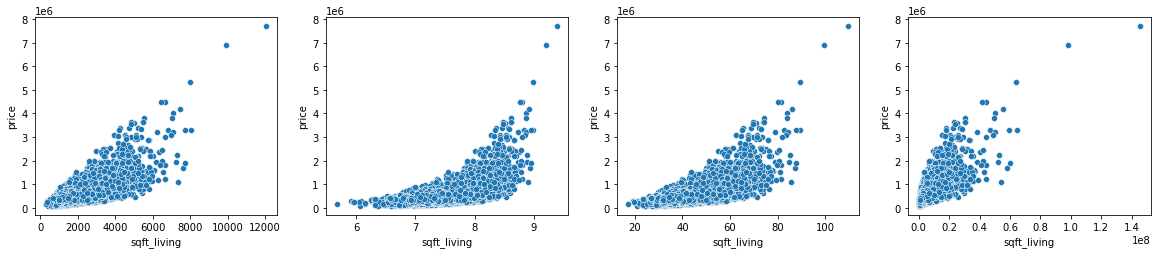

In [267]:
plt.figure(figsize=(20,8))
plt.subplot(1,4,1)
plt.xlabel("raw data")
sns.boxplot(y=house_1.sqft_living)
plt.subplot(1,4,2)
plt.xlabel("log trans")
sns.boxplot(y=np.log(house_1.sqft_living))
plt.subplot(1,4,3)
plt.xlabel("squareroot trans")
sns.boxplot(y=np.sqrt(house_1.sqft_living))
plt.subplot(1,4,4)
plt.xlabel("square trans")
sns.boxplot(y=np.square(house_1.sqft_living))
plt.show()
plt.figure(figsize=(20,8))
plt.subplot(2,4,1)
plt.xlabel("sqft_living")
sns.scatterplot(x=house_1.sqft_living,y=house_1.price)
plt.subplot(2,4,2)
plt.xlabel("sqft_living")
sns.scatterplot(y=house_1.price,x=np.log(house_1.sqft_living ))
plt.subplot(2,4,3)
plt.xlabel("sqft_living")
sns.scatterplot(y=house_1.price,x=np.sqrt(house_1.sqft_living))
plt.subplot(2,4,4)
plt.xlabel("sqft_living")
sns.scatterplot(y=house_1.price,x=np.square(house_1.sqft_living))
plt.show()

#### Taking only sqft_living because all the other three paramenters are dependent on sqft_living and grade

In [269]:
X_train_set5 = house_1[['bathrooms','sqft_living_log','waterfront','view','grade','lat']]
y_train = house[["price"]]
tenfold_cv(X_train_set5,y_train)

(0.601261467470984, 240161.69962177245)

In [268]:
X_train_set5 = house_1[['bathrooms','sqft_living_square','waterfront','view','grade','lat']]
y_train = house[["price"]]
tenfold_cv(X_train_set5,y_train)

(0.7007122305607114, 205720.6934110394)

#### Log transformation is not working here. Although sqaure transformation is working, it will create more right skew of data.

## 2) Feature generation techniques

#### calculating age

In [4]:
house_age = house.copy()

In [5]:
# calculating age of the house by taking the base age as either built yr or yr_renovated
house_age.loc[house_age.yr_renovated == 0, 'age'] = (house_age.date.str.slice(0,4).astype(int)) - (house_age.yr_built)
house_age.loc[house_age.yr_renovated > 0, 'age'] = (house_age.date.str.slice(0,4).astype(int))  - (house_age.yr_renovated)

In [6]:
house_age

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49.0
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,13.0
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000,72.0
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,87.0
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230,1.0
9757,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023,0.0
9758,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200,6.0
9759,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,5.0


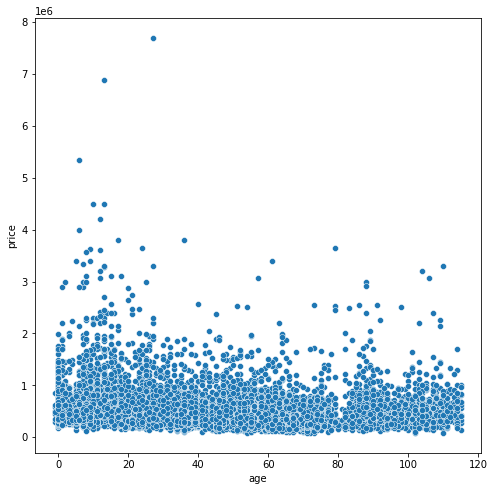

In [305]:
# plotting a scatter plot for age and price
plt.figure(figsize=(8,8))
sns.scatterplot(x = house_age.age ,y=house_age.price,)
plt.show()

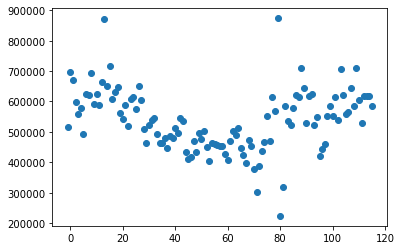

In [10]:
age_mean = pd.DataFrame(house_age[['age','price']].groupby(['age']).describe())
plt.scatter(age_mean.index,age_mean['price']['mean'])

In [29]:
house_age["age"].describe()

count    9761.000000
mean       41.094253
std        28.673028
min        -1.000000
25%        16.000000
50%        37.000000
75%        60.000000
max       115.000000
Name: age, dtype: float64

In [318]:
# Mean price of houses above median
house_age[(house_age.age >= house_age["age"].quantile(0.50))].price.mean()

486949.26094853686

In [319]:
# Mean prices of houses below median
house_age[(house_age.age < house_age["age"].quantile(0.50))].price.mean()

600250.1612567623

In [322]:
X_train_set3 = house_age[['bathrooms','sqft_living','waterfront','view','grade','lat','age']]
y_train = house_age[["price"]]
tenfold_cv(X_train_set3,y_train)

(0.6760301439273229, 216153.82721780677)

## Report :
**Although there is no linearilty for age  with price, age is considered because we can see that values below median and above median are having a considerable amount of difference which we can consider. We can see that r2 is increased and rmse value got decreased.**

## One hot encoding 

In [11]:
house_zip = house_age.copy()

In [14]:
# We will add dummies for all the zipcodes and concat it to the variables which we have finalized in Set 4.
one_hot_zip = pd.get_dummies(house_zip.zipcode, drop_first=True)                           # inserting dummy variables and dropping one dummy variable columns to avoid dummy trap
X = house_age[['bathrooms','sqft_living','waterfront','view','grade','age','lat','long']]  # taking the required columns
X_train = pd.concat([X,one_hot_zip],axis = 1)   # concating the original columns and one hot variables
y_train = house_age[["price"]]
tenfold_cv(X_train,y_train)                     # using the predefined function print the r2 and rmse values.

(0.7917351019190013, 174583.43157127954)

In [15]:
X_train.head(5)

,bathrooms,sqft_living,waterfront,view,grade,age,lat,long,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,3.00,1960,0,0,7,49.0,47.5208,-122.393,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,4.50,5420,0,0,11,13.0,47.6561,-122.005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.00,1160,0,0,7,72.0,47.6900,-122.292,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.00,1430,0,0,7,87.0,47.7558,-122.229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.75,1370,0,0,7,37.0,47.6127,-122.045,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Report :
**By implementing one hot encoding on zip code the r2 value increased enormously and rmse value also decreased with it so we are considering this.**

## One hot encoding for multi categorical variables

Tried  one hot encoding for multi categorical variables. In this case we are taking top 20 zipcodes which have highest number of counts and creating a model using them

In [30]:
house_zip2 = house_age.copy()

In [45]:
house_zip2.zipcode.value_counts().sort_values(ascending=False).head(50) # value counts for top 50 zip codes

98115    278
98052    264
98034    257
98103    257
98117    257
98038    256
98042    256
98023    250
98133    250
98118    231
98059    225
98006    214
98058    209
98155    208
98033    194
98053    190
98027    186
98056    186
98092    184
98125    183
98074    182
98075    164
98001    158
98144    151
98126    150
98106    145
98116    143
98199    140
98072    138
98004    138
98029    136
98028    134
98031    134
98008    133
98040    129
98136    129
98065    128
98198    127
98146    125
98122    124
98003    123
98112    122
98177    122
98055    118
98168    116
98030    114
98178    110
98022    105
98045    104
98166    101
Name: zipcode, dtype: int64

In [19]:
# taking top 20 most occuring zipcodes
top20 = [x for x in house_zip2.zipcode.value_counts().sort_values(ascending=False).head(20).index]  # bringing out the top 20 zip codes
top20

[98115,
 98052,
 98034,
 98103,
 98117,
 98038,
 98042,
 98023,
 98133,
 98118,
 98059,
 98006,
 98058,
 98155,
 98033,
 98053,
 98027,
 98056,
 98092,
 98125]

In [33]:
for column in top20:
    house_zip2[column] = np.where(house_zip2['zipcode']==column,1,0)   # adding the top 20 zipcodes and adding 1 and 0 to the respective column 

In [46]:
house_zip2.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,98115,98052,98034,98103,98117,98038,98042,98023,98133,98118,98059,98006,98058,98155,98033,98053,98027,98056,98092,98125
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,13.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000,72.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,87.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208,37.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
# Now considering the top 20 zipcodes and the variables which are finalized in set 4 we are testing the 10 fold regression
X = house_zip2[['bathrooms','sqft_living','waterfront','view','grade','age']]
one_hot_zip = house_zip2[[98115,98052,98034,98103,98117,98038,98042,98023,98133,98118,98059,98006,98058,98155,98033,98053,98027,98056,98092,98125]]
X_train = pd.concat([X,one_hot_zip],axis = 1)
y_train = house_zip2[["price"]]
tenfold_cv(X_train,y_train)

(0.6650232340933446, 219693.56976514164)

## Report :
**Tried to optimize the one hot coding by taking only the top 20 most ocurring zipcodes, but it did not work here because in our case samples are taken in more number for every zip code. There is no domination in a few zipcodes, it is distributed well. So this technique will not work here as we can see r2 decreased and rmse increased** 

# 5)

## Backward elimination method for Regression

#### Backward elimination
Backward stepwise selection (or backward elimination) is a variable selection method which:

Begins with a model that contains all variables under consideration (called the Full Model)
Then starts removing the least significant variables one after the other
Until a pre-specified stopping rule is reached or until no variable is left in the model

In [75]:
house_back = house_age.copy()

In [90]:
# We are considering all the one hot encoded zipcodes and using backward elimination method to get the variables which are effecting the most
one_hot_zip_back = pd.get_dummies(house_back.zipcode, drop_first=True)  # inserting dummy variables and dropping one dummy variable columns to avoid dummy trap
X = house_age[['bathrooms','sqft_living','waterfront','view','grade','age']]
X_train = pd.concat([X,one_hot_zip],axis = 1)
y_train = house_age[["price"]]

In [91]:
lreg = LinearRegression()   # creating an object for linear regression

sfs1 = sfs(lreg, k_features=30, forward=False, verbose=1, scoring='r2')   # syntax for backward elimination method

In [96]:
# !Donot run this code, this will take around 4 hours
#sfs1_score = []
#sfs1_kvalue = []
#for i in range(1,X_train.shape[1]+1):
#    lreg = LinearRegression()
#    sfs1 = sfs(lreg, k_features=i, forward=False, verbose=1, scoring='r2')
#    sfs1 = sfs1.fit(X_train, y_train)
#    sfs1_score.append(sfs1.k_score_)
#    sfs1_kvalue.append(i)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    6.7s finished
Features: 74/1[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    6.8s finished
Features: 73/1[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    6.4s finished
Features: 72/1[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    7.0s finished
Features: 71/1[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:    7.5s finished
Features: 70/1[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    7.3s finished
Features: 69/1[Parallel(

Features: 25/1[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.0s finished
Features: 24/1[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    1.0s finished
Features: 23/1[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.8s finished
Features: 22/1[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.8s finished
Features: 21/1[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.7s finished
Features: 20/1[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.7s finished
Features: 

Features: 49/2[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    3.0s finished
Features: 48/2[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    3.0s finished
Features: 47/2[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    2.8s finished
Features: 46/2[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    2.7s finished
Features: 45/2[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    2.6s finished
Features: 44/2[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    2.5s finished
Features: 

Features: 72/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    6.9s finished
Features: 71/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:    6.8s finished
Features: 70/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    6.4s finished
Features: 69/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:    6.0s finished
Features: 68/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:    6.1s finished
Features: 67/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    5.7s finished
Features: 

Features: 22/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.7s finished
Features: 21/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.7s finished
Features: 20/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.6s finished
Features: 19/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s finished
Features: 18/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished
Features: 17/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s finished
Features: 

Features: 44/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    2.5s finished
Features: 43/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    2.4s finished
Features: 42/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    2.6s finished
Features: 41/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    2.4s finished
Features: 40/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    2.3s finished
Features: 39/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    2.0s finished
Features: 

Features: 65/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    5.1s finished
Features: 64/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    5.0s finished
Features: 63/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    4.8s finished
Features: 62/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:    4.7s finished
Features: 61/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:    4.4s finished
Features: 60/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    4.5s finished
Features: 

Features: 15/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.3s finished
Features: 14/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s finished
Features: 13/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s finished
Features: 12/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.2s finished
Features: 11/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.2s finished
Features: 10/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
Features: 

Features: 35/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    1.7s finished
Features: 34/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    1.6s finished
Features: 33/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    1.5s finished
Features: 32/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.4s finished
Features: 31/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    1.3s finished
Features: 30/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.2s finished
Features: 

Features: 54/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    3.7s finished
Features: 53/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:    3.4s finished
Features: 52/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    3.5s finished
Features: 51/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    3.3s finished
Features: 50/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.3s finished
Features: 49/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    2.8s finished
Features: 

Features: 72/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    6.7s finished
Features: 71/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:    5.9s finished
Features: 70/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    5.8s finished
Features: 69/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:    5.4s finished
Features: 68/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:    5.5s finished
Features: 67/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    5.4s finished
Features: 

Features: 22/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.6s finished
Features: 21/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.6s finished
Features: 20/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s finished
Features: 19/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s finished
Features: 18/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished
Features: 17/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s finished
Features: 

Features: 39/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    1.8s finished
Features: 38/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    1.7s finished
Features: 37/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    1.6s finished
Features: 36/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    1.6s finished
Features: 35/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    1.5s finished
Features: 34/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    1.4s finished
Features: 

[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:    3.9s finished
Features: 55/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    3.7s finished
Features: 54/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    3.6s finished
Features: 53/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:    3.4s finished
Features: 52/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    3.4s finished
Features: 51/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    3.2s finished
Features: 50/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Par

Features: 71/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:    6.2s finished
Features: 70/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    6.3s finished
Features: 69/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:    5.6s finished
Features: 68/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:    5.5s finished
Features: 67/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    5.2s finished
Features: 66/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    5.5s finished
Feat

[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.6s finished
Features: 21/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.6s finished
Features: 20/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s finished
Features: 19/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s finished
Features: 18/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.4s finished
Features: 17/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.5s finished
Features: 16/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Par

Features: 36/12[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    1.5s finished
Features: 35/12[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    1.4s finished
Features: 34/12[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    1.4s finished
Features: 33/12[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    1.3s finished
Features: 32/12[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.2s finished
Features: 31/12[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    1.2s finished
Feat

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.0s finished
Features: 49/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    2.8s finished
Features: 48/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    2.7s finished
Features: 47/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    2.6s finished
Features: 46/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    2.6s finished
Features: 45/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    2.4s finished
Features: 44/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Par

Features: 62/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:    5.1s finished
Features: 61/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:    4.7s finished
Features: 60/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    4.7s finished
Features: 59/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    4.5s finished
Features: 58/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    4.3s finished
Features: 57/14[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    3.9s finished
Feat

[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    6.5s finished
Features: 73/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    6.0s finished
Features: 72/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    6.1s finished
Features: 71/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:    5.8s finished
Features: 70/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    5.8s finished
Features: 69/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:    5.8s finished
Features: 68/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Par

Features: 24/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.8s finished
Features: 23/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.7s finished
Features: 22/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.7s finished
Features: 21/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.6s finished
Features: 20/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.6s finished
Features: 19/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s finished
Feat

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    1.6s finished
Features: 34/16[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    1.5s finished
Features: 33/16[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    1.4s finished
Features: 32/16[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.3s finished
Features: 31/16[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    1.3s finished
Features: 30/16[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.2s finished
Features: 29/16[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Par

Features: 44/17[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    2.6s finished
Features: 43/17[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    2.5s finished
Features: 42/17[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    2.4s finished
Features: 41/17[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    2.2s finished
Features: 40/17[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    2.1s finished
Features: 39/17[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    2.1s finished
Feat

[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:    3.4s finished
Features: 52/18[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    3.5s finished
Features: 51/18[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    3.4s finished
Features: 50/18[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.3s finished
Features: 49/18[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    3.0s finished
Features: 48/18[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    3.0s finished
Features: 47/18[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Par

Features: 60/19[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    4.5s finished
Features: 59/19[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    4.3s finished
Features: 58/19[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    4.2s finished
Features: 57/19[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    3.9s finished
Features: 56/19[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:    4.0s finished
Features: 55/19[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    3.8s finished
Feat

[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    5.5s finished
Features: 66/20[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    6.0s finished
Features: 65/20[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    7.2s finished
Features: 64/20[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    5.4s finished
Features: 63/20[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    6.6s finished
Features: 62/20[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:    5.8s finished
Features: 61/20[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Par

Features: 72/21[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    7.0s finished
Features: 71/21[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:    6.2s finished
Features: 70/21[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    6.2s finished
Features: 69/21[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:    5.8s finished
Features: 68/21[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:    5.9s finished
Features: 67/21[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    5.5s finished
Feat

[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.8s finished
Features: 22/21[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.7s finished
Features: 21/21[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    6.8s finished
Features: 74/22[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    6.8s finished
Features: 73/22[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    6.5s finished
Features: 72/22[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    6.6s finished
Features: 71/22[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Par

Features: 27/22[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    1.1s finished
Features: 26/22[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    1.0s finished
Features: 25/22[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.9s finished
Features: 24/22[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.9s finished
Features: 23/22[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.8s finished
Features: 22/22[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    7.0s finished
Feat

[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    1.3s finished
Features: 30/23[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.2s finished
Features: 29/23[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    1.2s finished
Features: 28/23[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    1.1s finished
Features: 27/23[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    1.0s finished
Features: 26/23[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.9s finished
Features: 25/23[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Par

Features: 33/24[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    1.4s finished
Features: 32/24[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.3s finished
Features: 31/24[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    1.3s finished
Features: 30/24[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.2s finished
Features: 29/24[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    1.1s finished
Features: 28/24[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    1.1s finished
Feat

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    1.6s finished
Features: 34/25[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    1.5s finished
Features: 33/25[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    1.4s finished
Features: 32/25[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.4s finished
Features: 31/25[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    1.3s finished
Features: 30/25[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.3s finished
Features: 29/25[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Par

Features: 35/26[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    1.6s finished
Features: 34/26[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    1.5s finished
Features: 33/26[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    1.4s finished
Features: 32/26[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.3s finished
Features: 31/26[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    1.4s finished
Features: 30/26[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.0s finished
Feat

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    1.6s finished
Features: 34/27[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    1.7s finished
Features: 33/27[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    1.5s finished
Features: 32/27[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.4s finished
Features: 31/27[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    1.3s finished
Features: 30/27[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.2s finished
Features: 29/27[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Par

Features: 33/28[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    1.8s finished
Features: 32/28[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.4s finished
Features: 31/28[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    1.2s finished
Features: 30/28[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.2s finished
Features: 29/28[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    1.4s finished
Features: 28/28[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    7.8s finished
Feat

[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    1.3s finished
Features: 30/29[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.2s finished
Features: 29/29[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    7.0s finished
Features: 74/30[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    7.0s finished
Features: 73/30[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    6.4s finished
Features: 72/30[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    6.4s finished
Features: 71/30[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Par

Features: 72/31[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    6.5s finished
Features: 71/31[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:    6.2s finished
Features: 70/31[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    6.1s finished
Features: 69/31[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:    5.7s finished
Features: 68/31[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:    5.8s finished
Features: 67/31[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    5.4s finished
Feat

[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    5.9s finished
Features: 66/32[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    5.9s finished
Features: 65/32[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    5.5s finished
Features: 64/32[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    5.5s finished
Features: 63/32[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    5.1s finished
Features: 62/32[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:    5.3s finished
Features: 61/32[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Par

Features: 60/33[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    5.0s finished
Features: 59/33[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    5.1s finished
Features: 58/33[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    4.5s finished
Features: 57/33[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    4.4s finished
Features: 56/33[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:    4.9s finished
Features: 55/33[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    4.6s finished
Feat

[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:    3.5s finished
Features: 52/34[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    3.5s finished
Features: 51/34[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    3.5s finished
Features: 50/34[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.5s finished
Features: 49/34[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    3.1s finished
Features: 48/34[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    3.0s finished
Features: 47/34[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Par

Features: 44/35[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    2.5s finished
Features: 43/35[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    2.4s finished
Features: 42/35[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    2.3s finished
Features: 41/35[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    2.1s finished
Features: 40/35[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    2.1s finished
Features: 39/35[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    2.1s finished
Feat

[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    7.0s finished
Features: 73/37[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    6.4s finished
Features: 72/37[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    6.8s finished
Features: 71/37[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:    6.2s finished
Features: 70/37[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    6.5s finished
Features: 69/37[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:    5.9s finished
Features: 68/37[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Par

Features: 62/38[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:    4.9s finished
Features: 61/38[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:    4.5s finished
Features: 60/38[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    4.6s finished
Features: 59/38[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    4.3s finished
Features: 58/38[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    4.3s finished
Features: 57/38[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    4.3s finished
Feat

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.6s finished
Features: 49/39[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    3.1s finished
Features: 48/39[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    3.0s finished
Features: 47/39[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    2.8s finished
Features: 46/39[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    2.7s finished
Features: 45/39[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    3.0s finished
Features: 44/39[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Par

Features: 71/41[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:    6.7s finished
Features: 70/41[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    6.2s finished
Features: 69/41[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:    5.9s finished
Features: 68/41[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:    6.4s finished
Features: 67/41[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    5.5s finished
Features: 66/41[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    5.7s finished
Feat

[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:    4.3s finished
Features: 55/42[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    3.9s finished
Features: 54/42[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    3.9s finished
Features: 53/42[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:    3.5s finished
Features: 52/42[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    3.6s finished
Features: 51/42[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    3.6s finished
Features: 50/42[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Par

Features: 71/44[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:    7.2s finished
Features: 70/44[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    6.5s finished
Features: 69/44[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:    5.8s finished
Features: 68/44[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:    5.9s finished
Features: 67/44[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    5.4s finished
Features: 66/44[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    5.4s finished
Feat

[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:    3.6s finished
Features: 52/45[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    3.7s finished
Features: 51/45[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    3.4s finished
Features: 50/45[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.4s finished
Features: 49/45[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    3.1s finished
Features: 48/45[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    3.1s finished
Features: 47/45[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Par

Features: 62/47[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:    5.1s finished
Features: 61/47[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:    4.5s finished
Features: 60/47[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    4.7s finished
Features: 59/47[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    4.4s finished
Features: 58/47[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    4.3s finished
Features: 57/47[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    4.0s finished
Feat

[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:    6.2s finished
Features: 67/49[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    6.2s finished
Features: 66/49[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    5.9s finished
Features: 65/49[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    5.4s finished
Features: 64/49[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    5.3s finished
Features: 63/49[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    5.1s finished
Features: 62/49[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Par

Features: 69/51[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:    5.8s finished
Features: 68/51[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:    6.3s finished
Features: 67/51[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    5.7s finished
Features: 66/51[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    5.5s finished
Features: 65/51[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    5.2s finished
Features: 64/51[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    5.2s finished
Feat

[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    5.6s finished
Features: 66/53[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    5.9s finished
Features: 65/53[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    5.7s finished
Features: 64/53[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    5.1s finished
Features: 63/53[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    4.9s finished
Features: 62/53[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:    4.9s finished
Features: 61/53[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Par

Features: 60/55[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    5.6s finished
Features: 59/55[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    4.4s finished
Features: 58/55[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    4.2s finished
Features: 57/55[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed: 21.1min finished
Features: 56/55[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:    7.4s finished
Features: 55/55[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    6.2s finished
Feat

[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:    5.8s finished
Features: 67/58[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    5.4s finished
Features: 66/58[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    5.8s finished
Features: 65/58[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    5.2s finished
Features: 64/58[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    5.1s finished
Features: 63/58[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    4.8s finished
Features: 62/58[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Par

Features: 66/61[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    5.4s finished
Features: 65/61[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    5.3s finished
Features: 64/61[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    5.2s finished
Features: 63/61[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    4.9s finished
Features: 62/61[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:    4.8s finished
Features: 61/61[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    6.9s finished
Feat

[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    5.4s finished
Features: 66/65[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    5.4s finished
Features: 65/65[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    7.3s finished
Features: 74/66[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    7.2s finished
Features: 73/66[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    6.3s finished
Features: 72/66[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    6.4s finished
Features: 71/66[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Par

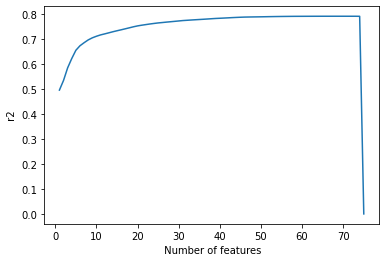

In [131]:
#  !!!!!!!!!!!!! donot execute this kernel
##############################################################
#plt.plot(sfs1_kvalue,sfs1_score)
#plt.xlabel(" Number of features")
#plt.ylabel(" r2 ")
#plt.show()

The above graph is to find the r2 values for all the possible number(shape of X-train) of predictors 

In [111]:
sfs1_score[25]

0.7653734571240386

In [128]:
sfs1_score[35]

0.7784709192784376

In [113]:
sfs1_score[40]

0.7832924551848056

In [135]:
# Finalaized the value of 40 as there is no much difference after that and finding out the variables.
house_back_reg = house_age.copy()
one_hot_zip_back = pd.get_dummies(house_back_reg.zipcode, drop_first=True)  # inserting dummy variables and dropping one dummy variable columns to avoid dummy trap
X = house_back_reg[['bathrooms','sqft_living','waterfront','view','grade','age']]
X_train = pd.concat([X,one_hot_zip_back],axis = 1)
y_train = house_back_reg[["price"]]
lreg_back = LinearRegression()
sfs1 = sfs(lreg_back, k_features=40, forward=False, verbose=1, scoring='r2',n_jobs = -1)  # setting the object
sfs1 = sfs1.fit(X_train, y_train)                                                         # fitting the train data to find the 40 columns
print("r2 score after selection of 40 features: ",sfs1.k_score_)                          # r2 value
print("Features selected : ",list(sfs1.k_feature_names_))                                 # features effecting

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    5.6s finished
Features: 74/40[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    3.8s finished
Features: 73/40[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:    4.0s finished
Features: 72/40[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    4.0s finished
Features: 71/40[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 

r2 score after selection of 40 features:  0.7824753450004109
Features selected :  ['sqft_living', 'waterfront', 'view', 'grade', 'age', 98004, 98005, 98006, 98007, 98008, 98023, 98029, 98033, 98034, 98039, 98040, 98052, 98053, 98074, 98075, 98092, 98102, 98103, 98105, 98107, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125, 98126, 98133, 98136, 98144, 98177, 98199]


In [136]:
# finding the r2 with and rmse using 10 fold validation
X_train_back = X_train[list(sfs1.k_feature_names_)]
y_train_back = house_back_reg[["price"]]
tenfold_cv(X_train_back,y_train_back)

(0.7834560608667263, 177814.3378748069)

## Report :
#### After considering the 40 variables out of 76 in backward elimination method, we still recieved a good value of r2 and rmse
**r2 = 0.7834560608667263**

**rmse = 177814.3378748069**

## Forward selection for regression

#### Forward selection
Forward stepwise selection (or forward selection) is a variable selection method which:

Begins with a model that contains no variables (called the Null Model)
Then starts adding the most significant variables one after the other
Until a pre-specified stopping rule is reached or until all the variables under consideration are included in the mode

In [133]:
# Finalaized the value of 40 and finding out the variables which effecting.
house_forward_reg = house_age.copy()
one_hot_zip_fwd = pd.get_dummies(house_forward_reg.zipcode, drop_first=True)  # inserting dummy variables and dropping one dummy variable columns to avoid dummy trap
X = house_forward_reg[['bathrooms','sqft_living','waterfront','view','grade','age']]
X_train = pd.concat([X,one_hot_zip_fwd],axis = 1)
y_train = house_forward_reg[["price"]]
lreg_fwd = LinearRegression()
sfs2 = sfs(lreg_fwd, k_features=40, forward=True, verbose=1, scoring='r2',n_jobs = -1)   # declaring the object
sfs2 = sfs2.fit(X_train, y_train)                                                        # fitting the model and finding out the columns
print("r2 score after selection of 40 features: ",sfs2.k_score_)                         # finding r2
print("Features selected : ",list(sfs2.k_feature_names_))                                # features effecting


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.8s finished
Features: 1/40[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    0.4s finished
Features: 2/40[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:    0.4s finished
Features: 3/40[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    0.4s finished
Features: 4/40[Parallel(n_jobs=-1)]: Usin

Features: 39/40[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.1s finished
Features: 40/40

r2 score after selection of 40 features:  0.7822219158605183
Features selected :  ['sqft_living', 'waterfront', 'view', 'grade', 'age', 98003, 98004, 98005, 98006, 98007, 98008, 98023, 98029, 98033, 98034, 98039, 98040, 98042, 98052, 98053, 98092, 98102, 98103, 98105, 98107, 98109, 98112, 98115, 98116, 98117, 98119, 98122, 98125, 98126, 98133, 98136, 98144, 98177, 98198, 98199]


In [134]:
# performing 10 fold linear regression in the variables from forward selection.
X_train_fwd = X_train[list(sfs2.k_feature_names_)]
y_train_fwd = house_forward_reg[["price"]]
tenfold_cv(X_train_fwd,y_train_fwd)

(0.7831233035731653, 177945.2544660927)

## Report :
#### After considering the 40 variables out of 76 in forward selection method, we  recieved a good value of r2 and rmse
**r2 = 0.7831233035731653**

**rmse = 177945.2544660927**

## Note:
**Considering only two predictor sets after this,first one contains all one hot encoding and second one containing only data from forward selection**

## 6) Decision Tree

### Hyper parameter tuning:
GridSearchCV is a method to search the candidate best parameters exhaustively from the grid of given parameters. Target estimator (model) and parameters for search need to be provided for this cross-validation search method. GridSearchCV is useful when we are looking for the best parameter for the target model and dataset. In this method, multiple parameters are tested by cross-validation and the best parameters can be extracted to apply for a predictive model.

### Verifying decision tree on all the hot encoded zipcodes

**Using grid search method to find the hyperparameters max_depth and min_samples_leaf for all the hot encoded zipcodes and other variables obtained in set 4** 

In [272]:
house_dt = house_age.copy()
one_hot_zip_dt = pd.get_dummies(house_dt.zipcode, drop_first=True)
X = house_dt[['bathrooms','sqft_living','waterfront','view','grade','age','lat','long']]
X_train = pd.concat([X,one_hot_zip_dt],axis = 1)
y_train = house_dt[["price"]]
clf = DecisionTreeRegressor()
parameters={'max_depth' : range(2,30,2),'min_samples_leaf': range(2,30,2)}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(clf,param_grid=parameters,cv =10,n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(2, 30, 2),
                         'min_samples_leaf': range(2, 30, 2)})

In [273]:
grid.best_estimator_

DecisionTreeRegressor(max_depth=12, min_samples_leaf=4)

**Using the parameters obtained and using this in the next step to find out the r2 and rmse values for decision tree**

In [259]:
cv = KFold(n_splits=10, shuffle=True,random_state=10)
dt = DecisionTreeRegressor(random_state= 100,max_depth=12, min_samples_leaf=4)
r2 = cross_val_score(dt, X_train, y_train, scoring='r2',
                         cv=cv)
rmse = cross_val_score(dt, X_train, y_train, scoring='neg_mean_squared_error',
                         cv=cv)
print(r2.mean(),np.sqrt(abs(rmse.mean())))

0.8068460826169727 167281.9884812319


## Report :
**A good r2 and rmse values are obtained with the found out leafs and depth**

**r2 =0.8068460826169727**

**rmse =167281.9884812319**

### Verifying Decision tree on the set identified in forward selection of regression

**Using grid search method to find the hyperparameters max_depth and min_samples_leaf for the hot encoded zipcodes and other variables obtained from the forward selection method**

In [174]:
house_dt = house_age.copy()
one_hot_zip_dt = pd.get_dummies(house_dt.zipcode, drop_first=True)
X = house_dt[['sqft_living', 'waterfront', 'view', 'grade', 'age','lat','long']]
X_merge = pd.concat([X,one_hot_zip_dt],axis = 1)
X_train = X_merge[['sqft_living', 'waterfront', 'view', 'grade', 'age', 98003, 98004, 98005, 98006, 98007, 98008, 98023, 98029, 98033, 98034, 98039, 98040, 98042, 98052, 98053, 98092, 98102, 98103, 98105, 98107, 98109, 98112, 98115, 98116, 98117, 98119, 98122, 98125, 98126, 98133, 98136, 98144, 98177, 98198, 98199]]
y_train = house_dt[["price"]]
clf = DecisionTreeRegressor()
parameters={'max_depth' : range(2,30,2),'min_samples_leaf': range(2,30,2)}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(clf,param_grid=parameters,cv =10,n_jobs=-1)
grid.fit(X_train,y_train)


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(2, 30, 2),
                         'min_samples_leaf': range(2, 30, 2)})

In [175]:
grid.best_estimator_

DecisionTreeRegressor(max_depth=18, min_samples_leaf=2)

**Using the parameters obtained and using this in the next step to find out the r2 and rmse values for decision tree**

In [176]:
house_dt = house_age.copy()
one_hot_zip_dt = pd.get_dummies(house_dt.zipcode, drop_first=True)
X = house_dt[['sqft_living', 'waterfront', 'view', 'grade', 'age','lat','long']]
X_merge = pd.concat([X,one_hot_zip_dt],axis = 1)
X_train = X_merge[['sqft_living', 'waterfront', 'view', 'grade', 'age', 98003, 98004, 98005, 98006, 98007, 98008, 98023, 98029, 98033, 98034, 98039, 98040, 98042, 98052, 98053, 98092, 98102, 98103, 98105, 98107, 98109, 98112, 98115, 98116, 98117, 98119, 98122, 98125, 98126, 98133, 98136, 98144, 98177, 98198, 98199]]
y_train = house_dt[["price"]]

cv = KFold(n_splits=10, shuffle=True,random_state=10)
dt = DecisionTreeRegressor(random_state= 100,max_depth=18, min_samples_leaf=2)
r2 = cross_val_score(dt, X_train, y_train, scoring='r2',
                         cv=cv)
rmse = cross_val_score(dt, X_train, y_train, scoring='neg_mean_squared_error',
                         cv=cv)
print(r2.mean(),np.sqrt(abs(rmse.mean())))

0.67892107843855 215786.24795109875


## Report :
**Comparitively a less r2 and rmse are obtained here, so ignoring this set of predictors**

**r2 = 0.67892107843855**

**rmse = 215786.24795109875**

## Note :

#### So out of the two predictor sets selected, we will take the decision tree and  linear regression with one hot encoding of all zipcodes.
#### Donot eliminate any zipcodes as the data in the left over zipcodes are impacting the models.
#### We can see clearly that r2 is more and rmse is less when all the zipcodes are considered . 
#### Along with this age is added as a new feature which is impacting the r2 and rmse.

## 7) Model Testing

**Testing the models with test data.**

In [233]:
house_test = pd.read_csv("kc_house_test_data.csv")            # importing test data

# Adding age to test data
house_test.loc[house_test.yr_renovated == 0, 'age'] = (house_test.date.str.slice(0,4).astype(int)) - (house_test.yr_built)
house_test.loc[house_test.yr_renovated > 0, 'age'] = (house_test.date.str.slice(0,4).astype(int))  - (house_test.yr_renovated)

# one hot encoding of zipcodes for test data
one_hot_zip = pd.get_dummies(house_test.zipcode, drop_first=True)

# taking the other predictors from the test data 
X = house_test[['bathrooms','sqft_living','waterfront','view','grade','age','lat','long']]
X_test = pd.concat([X,one_hot_zip],axis = 1)   # concatenate zip codes and variables obtained
y_actual = house_test[['price']]   # y_actual

## Fitting Linear regression Model

In [275]:
# preparing data to fit the model
one_hot_zip = pd.get_dummies(house_zip.zipcode, drop_first=True) 
X = house_age[['bathrooms','sqft_living','waterfront','view','grade','age','lat','long']]
X_train = pd.concat([X,one_hot_zip],axis = 1)
y_train = house_age[["price"]]

regressor = LinearRegression(fit_intercept=True) # decalring linear regression object
regressor.fit(X_train,y_train)                   # fitting the model
y_pred = regressor.predict(X_test)               # predicting the test data
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_actual,y_pred)                   # finding r2 values
rmse = np.sqrt(mean_squared_error(y_actual,y_pred))  # finding rmse value
print("R square :",r2)
print("RMSE :",rmse)

R square : 0.8057267459002713
RMSE : 157944.13854355202


## Fitting Decision Tree Model

In [274]:
# preparing data to fit the model
one_hot_zip = pd.get_dummies(house_zip.zipcode, drop_first=True) 
X = house_age[['bathrooms','sqft_living','waterfront','view','grade','age','lat','long']]
X_train = pd.concat([X,one_hot_zip],axis = 1)
y_train = house_age[["price"]]

dtree = DecisionTreeRegressor(max_depth=12, min_samples_leaf=4) # decalring decision tree object with the hyperparameters obtained in the previous step
dtree.fit(X_train,y_train)            # fitting the model

y_pred_dt = dtree.predict(X_test)     # predicting the test data
from sklearn.metrics import mean_squared_error, r2_score

r2_dt = r2_score(y_actual,y_pred_dt)   # finding r2 values
rmse_dt = np.sqrt(mean_squared_error(y_actual,y_pred_dt))  # finding rmse values
print("R square :",r2_dt)
print("RMSE :",rmse_dt)

R square : 0.7763101504957882
RMSE : 169480.65929022562


## Final Report :
**So we can clearly see r2 is higher and rmse is lower for linear regression model. So here linear regression should be considered instead of decision tree for the given parameters**

**Regression outputs :**

**R square : 0.8057267459002713**

**RMSE : 157944.13854355202**